In [38]:
from all_functions import *

SyntaxError: invalid decimal literal (3867552031.py, line 2)

# 6 Hour Test Campaign Analysis

Welcome to this notebook where you can find visualisations of the results for the 6-hour test campaign.

The test campaign is split into four sets:
1. **Unicast vs Multicast**: Self explanatory.
2. **Participant Measure**: Measuring performance while varying the number of participants.
3. **DDOS**: Measuring performance while under simulated distributed denial of service attack.
4. **Malicious Subscribers**: Measuring performance while varying number of malicious subscribers access the data.

## Set 1: Unicast vs Multicast

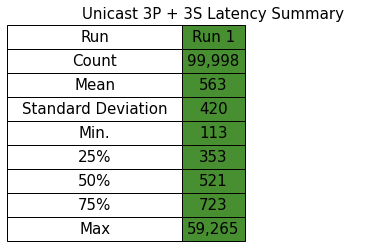

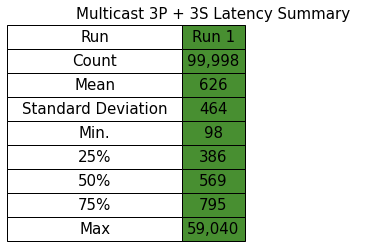

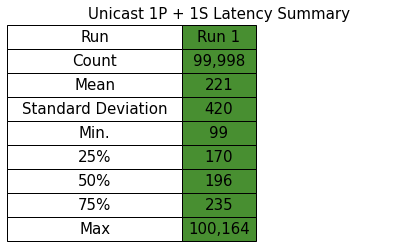

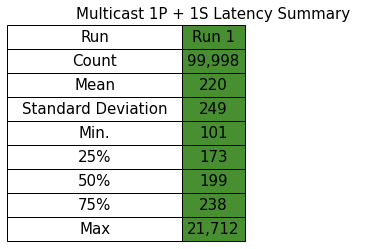

In [59]:
plot_lat_summary_table([file for file in get_files("data/v2/set_1") if 'average_latencies' in file])

## Latency Analysis

### 1 Pub/Sub vs 3 Pub/Sub (6-Hour) Comparison

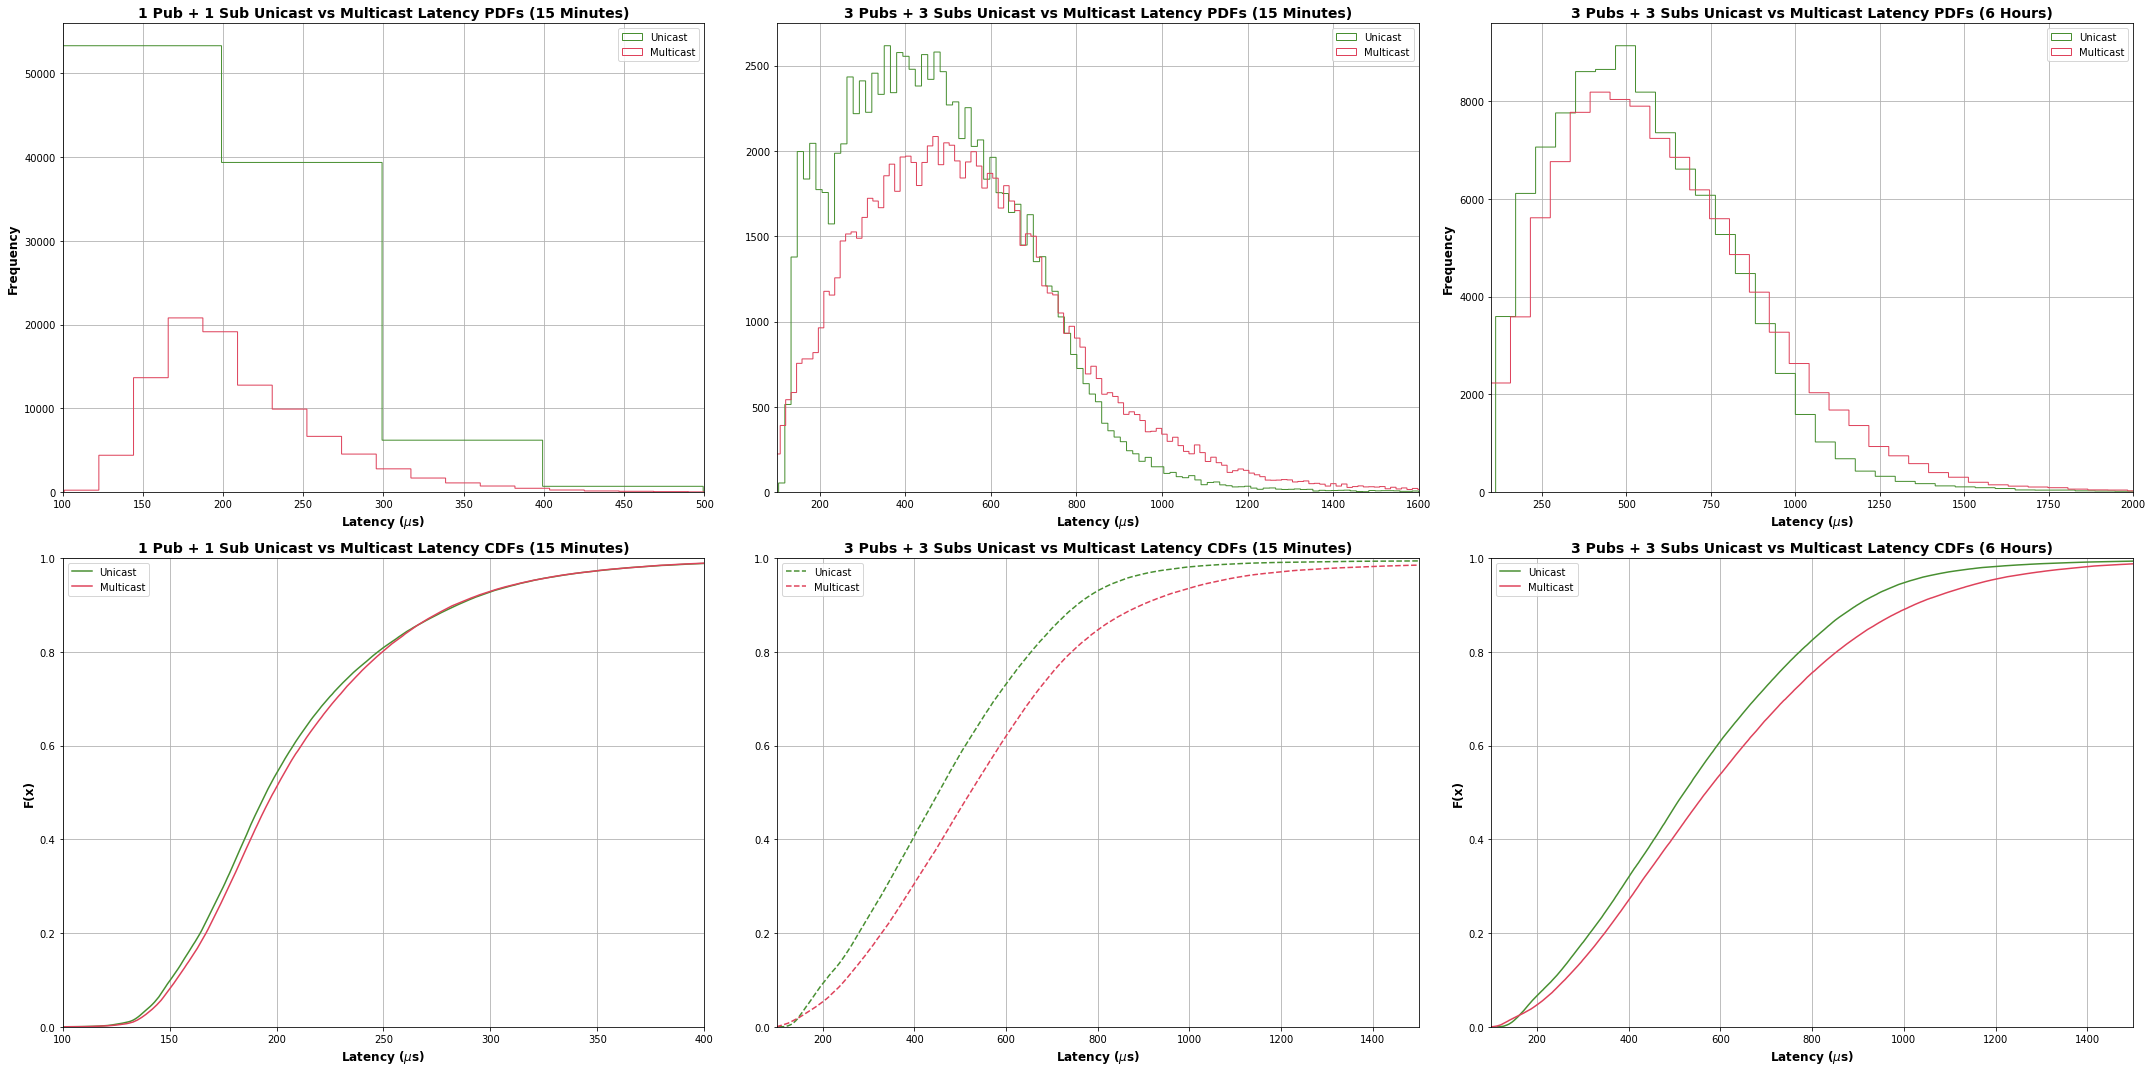

In [60]:
# ---------------------------------------------------------------------------- #
#                                File Collection                               #
# ---------------------------------------------------------------------------- #
v2_files = [file for file in get_files("data/v2/set_1") if 'average' in file]
v1_files = [file for file in get_files("data/v1/set_1") if 'average' in file]
v1_lat_files = [file for file in v1_files if 'average_latencies' in file]
v2_lat_files = [file for file in v2_files if 'average_latencies' in file]

# ---------------------------------------------------------------------------- #
#                                Figure Creation                               #
# ---------------------------------------------------------------------------- #
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))

# ---------------------------------------------------------------------------- #
#                                  DataFrames                                  #
# ---------------------------------------------------------------------------- #
ucast_1p1s_df = pd.read_csv([file for file in v2_lat_files if '1_3_' in file][0])
mcast_1p1s_df = pd.read_csv([file for file in v2_lat_files if '1_4_' in file][0])
ucast_3p3s_df = pd.read_csv([file for file in v2_lat_files if '1_1_' in file][0])
mcast_3p3s_df = pd.read_csv([file for file in v2_lat_files if '1_2_' in file][0])
ucast_3p3s_df_15m = pd.read_csv([file for file in v1_lat_files if '1_1_' in file][0])
mcast_3p3s_df_15m = pd.read_csv([file for file in v1_lat_files if '1_2_' in file][0])

# ---------------------------------------------------------------------------- #
#                                    Titles                                    #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_title("1 Pub + 1 Sub Unicast vs Multicast Latency PDFs (15 Minutes)", fontsize=14, fontweight="bold")
axes[0, 1].set_title("3 Pubs + 3 Subs Unicast vs Multicast Latency PDFs (15 Minutes)", fontsize=14, fontweight="bold")
axes[0, 2].set_title("3 Pubs + 3 Subs Unicast vs Multicast Latency PDFs (6 Hours)", fontsize=14, fontweight="bold")

axes[1, 0].set_title("1 Pub + 1 Sub Unicast vs Multicast Latency CDFs (15 Minutes)", fontsize=14, fontweight="bold")
axes[1, 1].set_title("3 Pubs + 3 Subs Unicast vs Multicast Latency CDFs (15 Minutes)", fontsize=14, fontweight="bold")
axes[1, 2].set_title("3 Pubs + 3 Subs Unicast vs Multicast Latency CDFs (6 Hours)", fontsize=14, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                   PDF Plots                                  #
# ---------------------------------------------------------------------------- #
plot_hist("Unicast", ucast_1p1s_df["run_1_latency"], axes[0, 0], greens[0])
plot_hist("Multicast", mcast_1p1s_df["run_1_latency"], axes[0, 0], reds[0])

plot_hist("Unicast", pd.concat([ucast_3p3s_df_15m["run_1_latency"], ucast_3p3s_df_15m["run_2_latency"], ucast_3p3s_df_15m["run_3_latency"]]), axes[0, 1], greens[0])
plot_hist("Multicast", pd.concat([mcast_3p3s_df_15m["run_1_latency"], mcast_3p3s_df_15m["run_2_latency"], mcast_3p3s_df_15m["run_3_latency"]]), axes[0, 1], reds[0])

plot_hist("Unicast", ucast_3p3s_df["run_1_latency"], axes[0, 2], greens[0])
plot_hist("Multicast", mcast_3p3s_df["run_1_latency"], axes[0, 2], reds[0])

# ---------------------------------------------------------------------------- #
#                                   CDF Plots                                  #
# ---------------------------------------------------------------------------- #
plot_cdf("Unicast", ucast_1p1s_df["run_1_latency"], axes[1, 0], greens[0], 'normal')
plot_cdf("Multicast", mcast_1p1s_df["run_1_latency"], axes[1, 0], reds[0], 'normal')

plot_cdf("Unicast", pd.concat([ucast_3p3s_df_15m["run_1_latency"], ucast_3p3s_df_15m["run_2_latency"], ucast_3p3s_df_15m["run_3_latency"]]), axes[1, 1], greens[0], 'average')
plot_cdf("Multicast", pd.concat([mcast_3p3s_df_15m["run_1_latency"], mcast_3p3s_df_15m["run_2_latency"], mcast_3p3s_df_15m["run_3_latency"]]), axes[1, 1], reds[0], 'average')

plot_cdf("Unicast", ucast_3p3s_df["run_1_latency"], axes[1, 2], greens[0], 'normal')
plot_cdf("Multicast", mcast_3p3s_df["run_1_latency"], axes[1, 2], reds[0], 'normal')

# ---------------------------------------------------------------------------- #
#                                   X-Labels                                   #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.set_xlabel("Latency ($\mu$s)", fontsize=12, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                   Y-Labels                                   #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_ylabel("Frequency", fontsize=12, fontweight="bold")
axes[0, 2].set_ylabel("Frequency", fontsize=12, fontweight="bold")
axes[1, 0].set_ylabel("F(x)", fontsize=12, fontweight="bold")
axes[1, 2].set_ylabel("F(x)", fontsize=12, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                   X-Limits                                   #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_xlim(xmin=100, xmax=500)
axes[0, 1].set_xlim(xmin=100, xmax=1600)
axes[0, 2].set_xlim(xmin=100, xmax=2000)

axes[1, 0].set_xlim(xmin = 100, xmax = 400)
axes[1, 1].set_xlim(xmin = 100, xmax = 1500)
axes[1, 2].set_xlim(xmin = 100, xmax = 1500)

# ---------------------------------------------------------------------------- #
#                                   Y-Limits                                   #
# ---------------------------------------------------------------------------- #
for ax in [axes[1, 0], axes[1, 1], axes[1, 2]]:
    ax.set_ylim(ymin = 0, ymax = 1) 
    
# ---------------------------------------------------------------------------- #
#                                     Grids                                    #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.grid()

# ---------------------------------------------------------------------------- #
#                                    Legends                                   #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.legend()

plt.tight_layout()

### 15-Minute vs 6-Hour Comparison

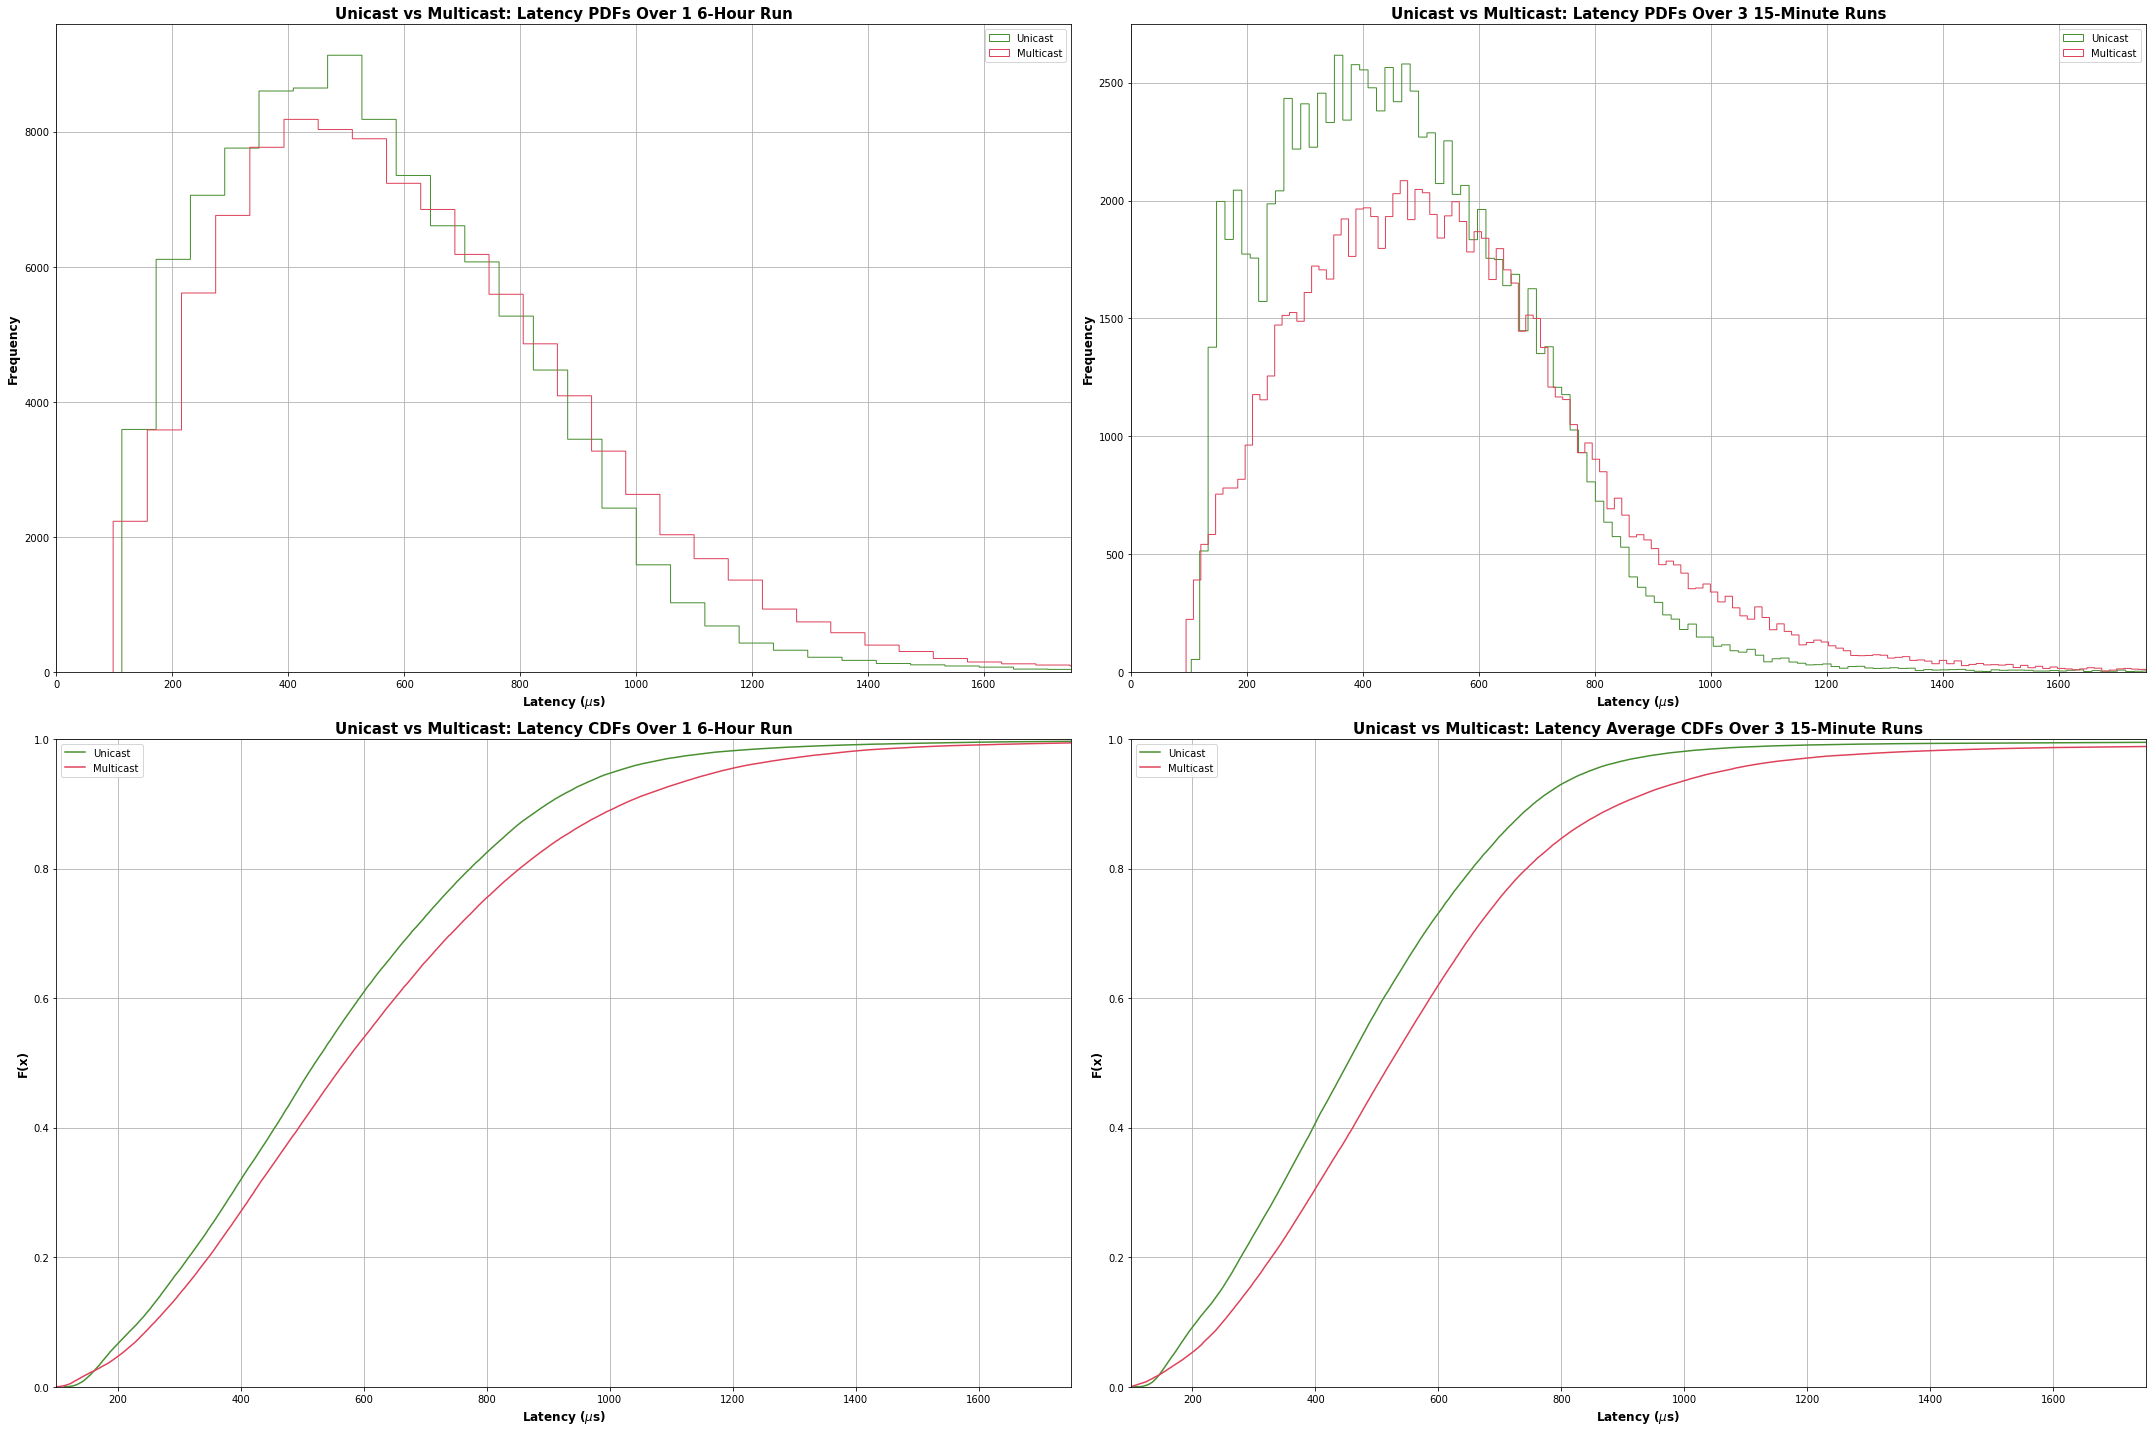

In [61]:
# ---------------------------------------------------------------------------- #
#                                File Collection                               #
# ---------------------------------------------------------------------------- #
v2files = [file for file in get_files('data/v2/set_1') if 'average' in file]
v2raw_lat_files = [file for file in v2files if 'average_latencies' in file]
v2avg_lats = { 'unicast': v2raw_lat_files[0], 'multicast': v2raw_lat_files[1] }

v1files = [file for file in get_files('data/v1/set_1') if 'average' in file and 'forced' in file]
v1raw_lat_files = [file for file in v1files if 'average_latencies' in file]
v1avg_lats = { 'unicast': v1raw_lat_files[0], 'multicast': v1raw_lat_files[1] }

# ---------------------------------------------------------------------------- #
#                                Figure Creation                               #
# ---------------------------------------------------------------------------- #
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))

# ---------------------------------------------------------------------------- #
#                                  Dataframes                                  #
# ---------------------------------------------------------------------------- #
v2udf = pd.read_csv(v2avg_lats['unicast'])
v2mdf = pd.read_csv(v2avg_lats['multicast'])
v1udf = pd.read_csv(v1avg_lats['unicast'])
v1mdf = pd.read_csv(v1avg_lats['multicast'])
v1ucombined_df = pd.concat([ v1udf['run_1_latency'], v1udf['run_2_latency'], v1udf['run_3_latency'] ])
v1mcombined_df = pd.concat([ v1mdf['run_1_latency'], v1mdf['run_2_latency'], v1mdf['run_3_latency'] ])

# ---------------------------------------------------------------------------- #
#                                   CDF Plots                                  #
# ---------------------------------------------------------------------------- #
plot_cdf('Unicast', v2udf['run_1_latency'], axes[1, 0], greens[0], 'latency')
plot_cdf('Multicast', v2mdf['run_1_latency'], axes[1, 0], reds[0], 'latency')
plot_cdf('Unicast', v1ucombined_df, axes[1, 1], greens[0], 'normal')
plot_cdf('Multicast', v1mcombined_df, axes[1, 1], reds[0], 'normal')

# ---------------------------------------------------------------------------- #
#                                   KDE Plots                                  #
# ---------------------------------------------------------------------------- #
plot_hist("Unicast", v2udf['run_1_latency'], axes[0, 0], greens[0])  
plot_hist("Multicast", v2mdf['run_1_latency'], axes[0, 0], reds[0])  
plot_hist("Unicast", v1ucombined_df, axes[0, 1], greens[0])  
plot_hist("Multicast", v1mcombined_df, axes[0, 1], reds[0])

# ---------------------------------------------------------------------------- #
#                                    Titles                                    #
# ---------------------------------------------------------------------------- #
fontsize = 15
fontweight = 'bold'
_ = axes[0, 0].set_title("Unicast vs Multicast: Latency PDFs Over 1 6-Hour Run", fontsize=fontsize, fontweight=fontweight)
_ = axes[0, 1].set_title("Unicast vs Multicast: Latency PDFs Over 3 15-Minute Runs", fontsize=fontsize, fontweight=fontweight)
_ = axes[1, 0].set_title("Unicast vs Multicast: Latency CDFs Over 1 6-Hour Run", fontsize=fontsize, fontweight=fontweight)
_ = axes[1, 1].set_title("Unicast vs Multicast: Latency Average CDFs Over 3 15-Minute Runs", fontsize=fontsize, fontweight=fontweight)

# ---------------------------------------------------------------------------- #
#                                   X-Labels                                   #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.set_xlabel("Latency ($\mu$s)", fontsize=12, fontweight="bold")
    
# ---------------------------------------------------------------------------- #
#                                   Y-Labels                                   #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_ylabel("Frequency", fontsize=12, fontweight=fontweight)
axes[0, 1].set_ylabel("Frequency", fontsize=12, fontweight=fontweight)
axes[1, 0].set_ylabel("F(x)", fontsize=12, fontweight=fontweight)
axes[1, 1].set_ylabel("F(x)", fontsize=12, fontweight=fontweight)

# ---------------------------------------------------------------------------- #
#                                     Grids                                    #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.grid()

# ---------------------------------------------------------------------------- #
#                                   Y-Limits                                   #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_ylim(ymin=0)
axes[0, 1].set_ylim(ymin=0)
axes[1, 0].set_ylim(ymin=0, ymax=1)
axes[1, 1].set_ylim(ymin=0, ymax=1)

# ---------------------------------------------------------------------------- #
#                                   X-Limits                                   #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_xlim(xmin=0, xmax=1750)
axes[0, 1].set_xlim(xmin=0, xmax=1750)
axes[1, 0].set_xlim(xmin=100, xmax=1750)
axes[1, 1].set_xlim(xmin=100, xmax=1750)

# ---------------------------------------------------------------------------- #
#                                    Legends                                   #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.legend()

# ---------------------------------------------------------------------------- #
#                                 Code Archive                                 #
# ---------------------------------------------------------------------------- #
# u_mean = v2udf['run_1_latency'].mean()
# axes[0].axvline(u_mean, 0, 1, ls="--", color=greens[0], label="Unicast Mean")

# m_mean = v2mdf['run_1_latency'].mean()

# axes[0].axvline(m_mean, 0, 1, ls="--", color=reds[0], label="Multicast Mean")

# xticks_list = list(axes[1, 0].get_xticks())
# xticks_list.remove(600.0)
# axes[1, 0].set_xticks(xticks_list + [u_mean, m_mean, ])

# unicast_mean = v1ucombined_df.mean()
# axes[1, 1].axvline(unicast_mean, 0, 1, ls="--", color=greens[1, 0], label="Unicast Mean")

# multicast_mean = v1mcombined_df.mean()
# axes[1, 1].axvline(multicast_mean, 0, 1, ls="--", color=reds[1, 0], label="Multicast Mean")

# axes[1, 1].set_xticks(list(axes[1, 1].get_xticks()) + [unicast_mean, multicast_mean, ])

plt.tight_layout()

## Throughput Analysis

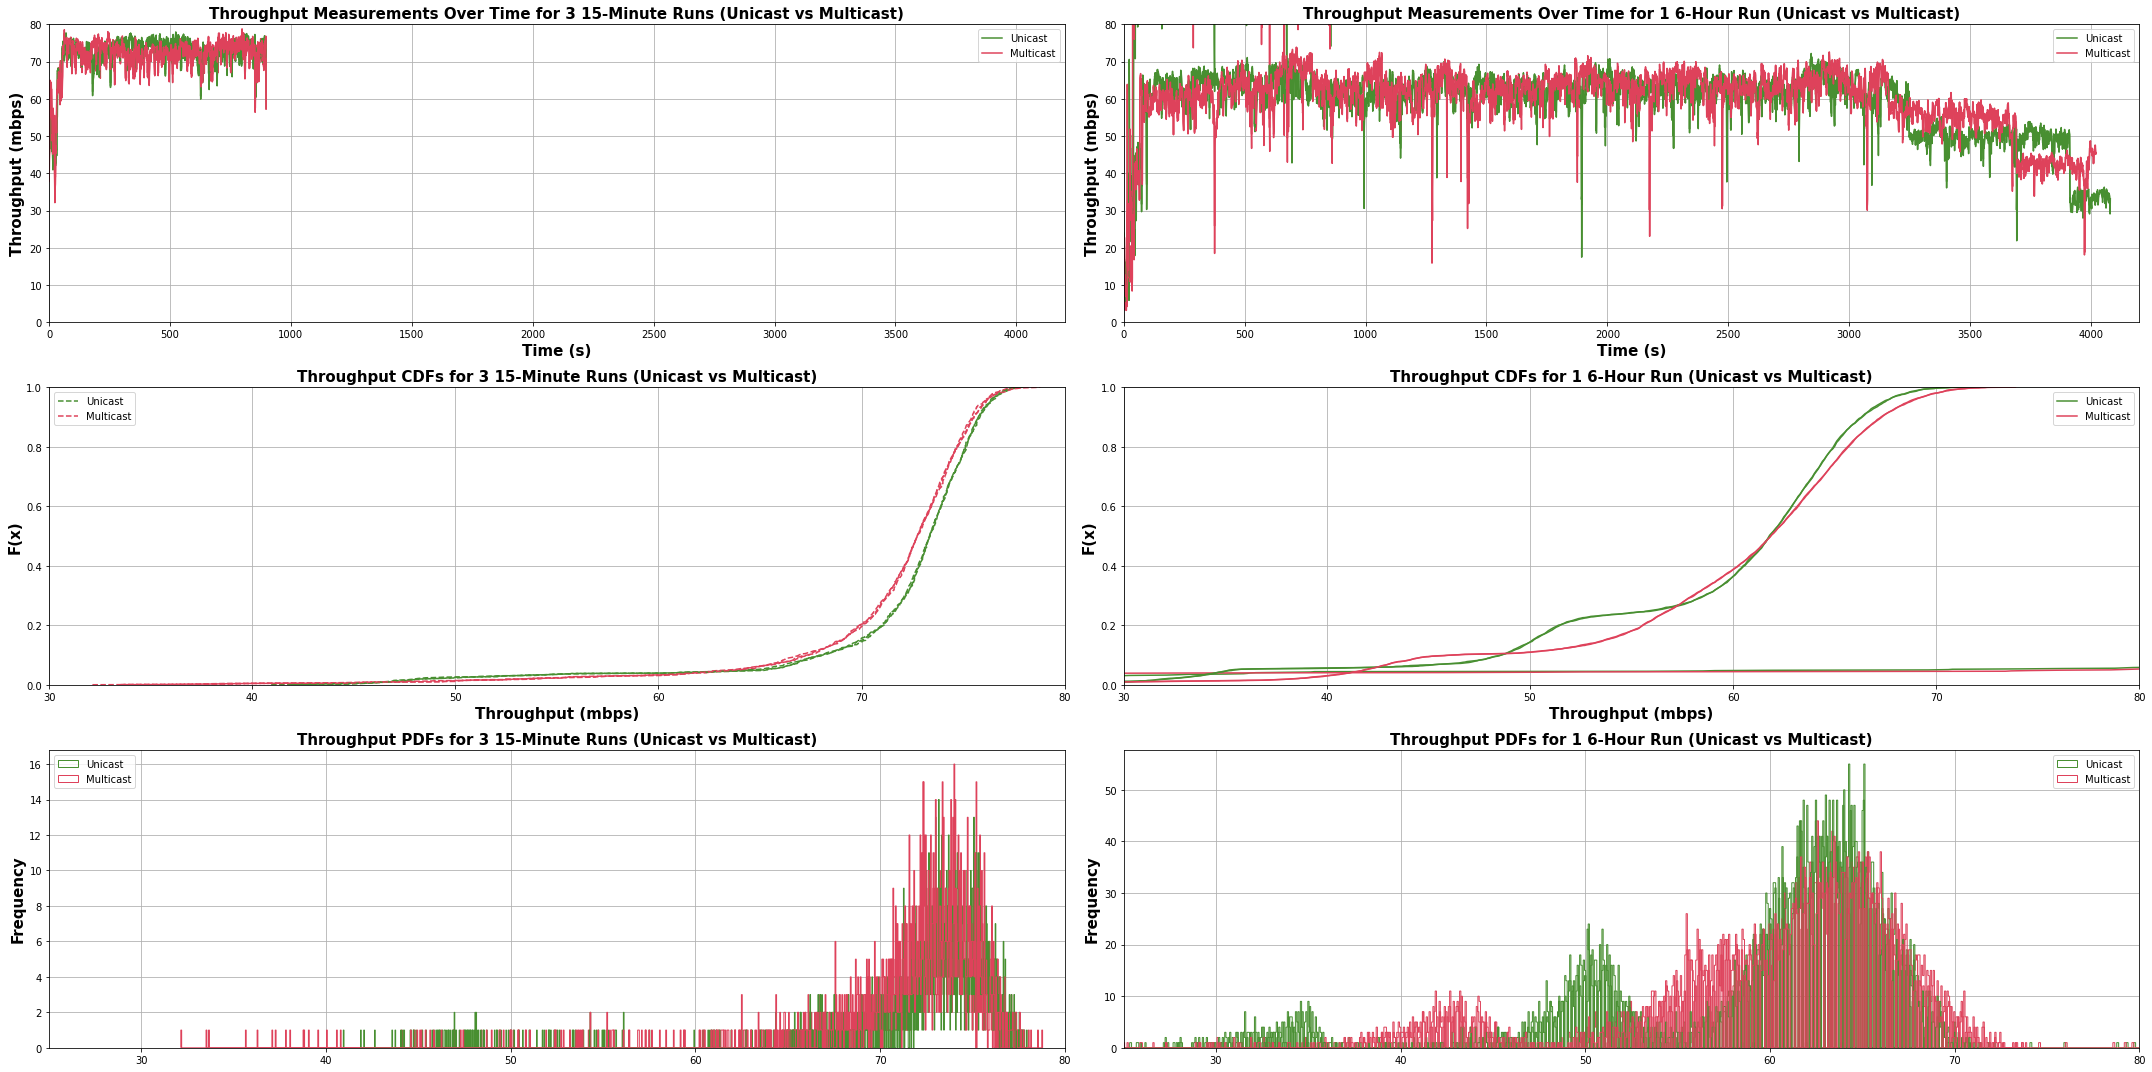

In [62]:
# ---------------------------------------------------------------------------- #
#                             Function Definitions                             #
# ---------------------------------------------------------------------------- #
def get_tp_data(files):
    tps = {
        "sub0": [],
        "sub1": [],
        "sub2": []
    }
    """
    For each file:
        For each sub:
            Get average throughputs
    """
    for file in files:
        df = pd.read_csv(file)
        if 'sub_0' in file:
            tps["sub0"] = df["avg_run_throughput"]
        elif 'sub_1' in file:
            tps["sub1"] = df["avg_run_throughput"]
        elif 'sub_2' in file:
            tps["sub2"] = df["avg_run_throughput"]
            
    return tps
# ---------------------------------------------------------------------------- #
#                                File Collection                               #
# ---------------------------------------------------------------------------- #
v1_tp_files = [file for file in get_files('data/v1/set_1') if 'average_throughput' in file]
v1u_tp_files = [file for file in v1_tp_files if 'unicast' in file]
v1m_tp_files = [file for file in v1_tp_files if 'multicast' in file]
v2_tp_files = [file for file in get_files('data/v2/set_1') if 'average_throughput' in file]
v2u_tp_files = [file for file in v2_tp_files if 'unicast' in file]
v2m_tp_files = [file for file in v2_tp_files if 'multicast' in file]

# ---------------------------------------------------------------------------- #
#                             Dataframe Collection                             #
# ---------------------------------------------------------------------------- #
v1u_tp_df = get_tp_data(v1u_tp_files)
v1m_tp_df = get_tp_data(v1m_tp_files)
v2u_tp_df = get_tp_data(v2u_tp_files)
v2m_tp_df = get_tp_data(v2m_tp_files)


# ---------------------------------------------------------------------------- #
#                               Figure Definition                              #
# ---------------------------------------------------------------------------- #
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))

# ---------------------------------------------------------------------------- #
#                                  Line Plots                                  #
# ---------------------------------------------------------------------------- #
for col in v1u_tp_df:
    ulabel = None
    mlabel = None
    
    if "sub0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
        
    axes[0, 0].plot(v1u_tp_df[col], color=greens[0], label=ulabel)
    axes[0, 1].plot(v2u_tp_df[col], color=greens[0], label=ulabel)
    axes[0, 0].plot(v1m_tp_df[col], color=reds[0], label=mlabel)
    axes[0, 1].plot(v2m_tp_df[col], color=reds[0], label=mlabel)

# ---------------------------------------------------------------------------- #
#                                   CDF Plots                                  #
# ---------------------------------------------------------------------------- #
for col in v1u_tp_df:
    ulabel = ""
    mlabel = ""
    
    if "sub0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    
    plot_cdf(ulabel, v1u_tp_df[col], axes[1, 0], greens[0], "average")
    plot_cdf(mlabel, v1m_tp_df[col], axes[1, 0], reds[0], "average")
    plot_cdf(ulabel, v2u_tp_df[col], axes[1, 1], greens[0], "normal")
    plot_cdf(mlabel, v2m_tp_df[col], axes[1, 1], reds[0], "normal")

# ---------------------------------------------------------------------------- #
#                                   PDF Plots                                  #
# ---------------------------------------------------------------------------- #
for col in v1u_tp_df:
    ulabel = ""
    mlabel = ""
    
    if "sub0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    
    plot_hist(ulabel, v1u_tp_df[col], axes[2, 0], greens[0])
    plot_hist(mlabel, v1m_tp_df[col], axes[2, 0], reds[0])
    plot_hist(ulabel, v2u_tp_df[col], axes[2, 1], greens[0])
    plot_hist(mlabel, v2m_tp_df[col], axes[2, 1], reds[0])

# ---------------------------------------------------------------------------- #
#                                   X-Labels                                   #
# ---------------------------------------------------------------------------- #
for ax in [axes[0, 0], axes[0, 1]]:
    ax.set_xlabel("Time (s)", fontsize = 15, fontweight="bold")

for ax in [axes[1, 0], axes[1, 1]]:
    ax.set_xlabel("Throughput (mbps)", fontsize = 15, fontweight="bold")
    
# ---------------------------------------------------------------------------- #
#                                   Y-Labels                                   #
# ---------------------------------------------------------------------------- #
for ax in [axes[0, 0], axes[0, 1]]:
    ax.set_ylabel("Throughput (mbps)", fontsize = 15, fontweight="bold")
    
for ax in [axes[1, 0], axes[1, 1]]:
    ax.set_ylabel("F(x)", fontsize = 15, fontweight="bold")

for ax in [axes[2, 0], axes[2, 1]]:
    ax.set_ylabel("Frequency", fontsize = 15, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                    Titles                                    #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_title("Throughput Measurements Over Time for 3 15-Minute Runs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[0, 1].set_title("Throughput Measurements Over Time for 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[1, 0].set_title("Throughput CDFs for 3 15-Minute Runs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[1, 1].set_title("Throughput CDFs for 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[2, 0].set_title("Throughput PDFs for 3 15-Minute Runs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[2, 1].set_title("Throughput PDFs for 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                   X-Limits                                   #
# ---------------------------------------------------------------------------- #
for ax in [axes[0, 0], axes[0, 1]]:
    ax.set_xlim(xmin=0, xmax=4200)
    
for ax in [axes[1, 0], axes[1, 1]]:
    ax.set_xlim(xmin=30, xmax=80)
    
for ax in [axes[2, 0], axes[2, 1]]:
    ax.set_xlim(xmin=25, xmax=80)
    
# ---------------------------------------------------------------------------- #
#                                   Y-Limits                                   #
# ---------------------------------------------------------------------------- #
for ax in [axes[0, 0], axes[0, 1]]:
    ax.set_ylim(ymin=0, ymax=80)
    
for ax in [axes[1, 0], axes[1, 1]]:
    ax.set_ylim(ymin=0, ymax=1)
    
    
# ---------------------------------------------------------------------------- #
#                                     Grids                                    #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.grid()

# ---------------------------------------------------------------------------- #
#                                    Legends                                   #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    _ = ax.legend()

# ---------------------------------------------------------------------------- #
#                                 Code Archive                                 #
# ---------------------------------------------------------------------------- #
# for ax in [axes[2, 0], axes[2, 1]]:
    # ax.set_ylim(ymin=0, ymax=0.16)

plt.tight_layout()

# Set 2: Participant Measure

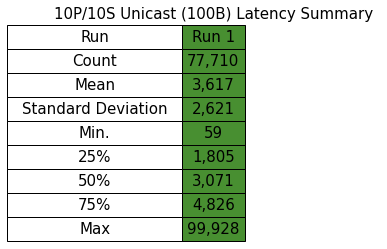

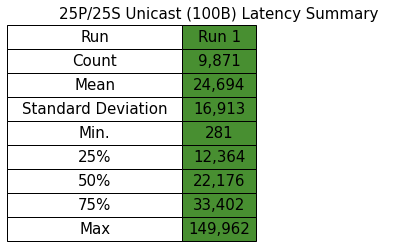

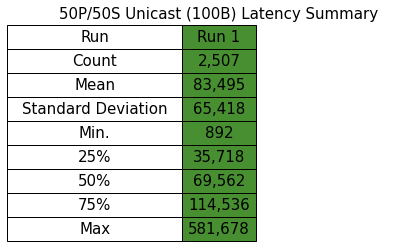

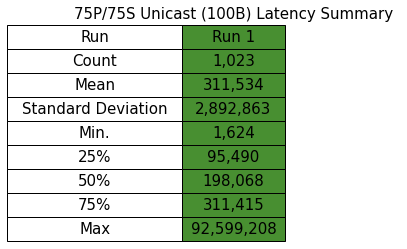

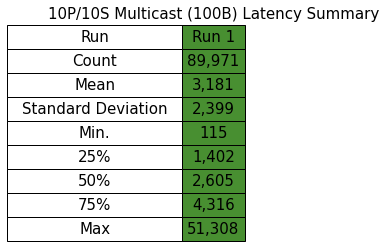

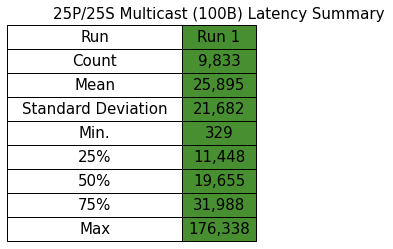

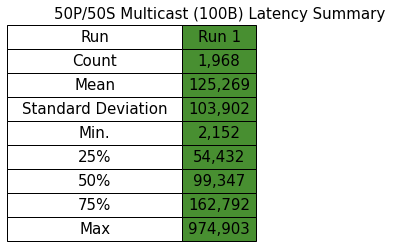

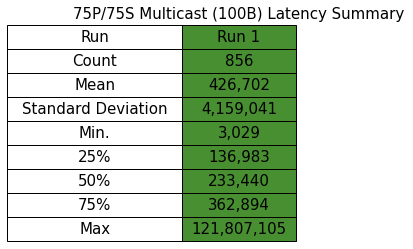

In [63]:
plot_lat_summary_table([file for file in get_files("data/v2/set_2") if 'average_latencies' in file])

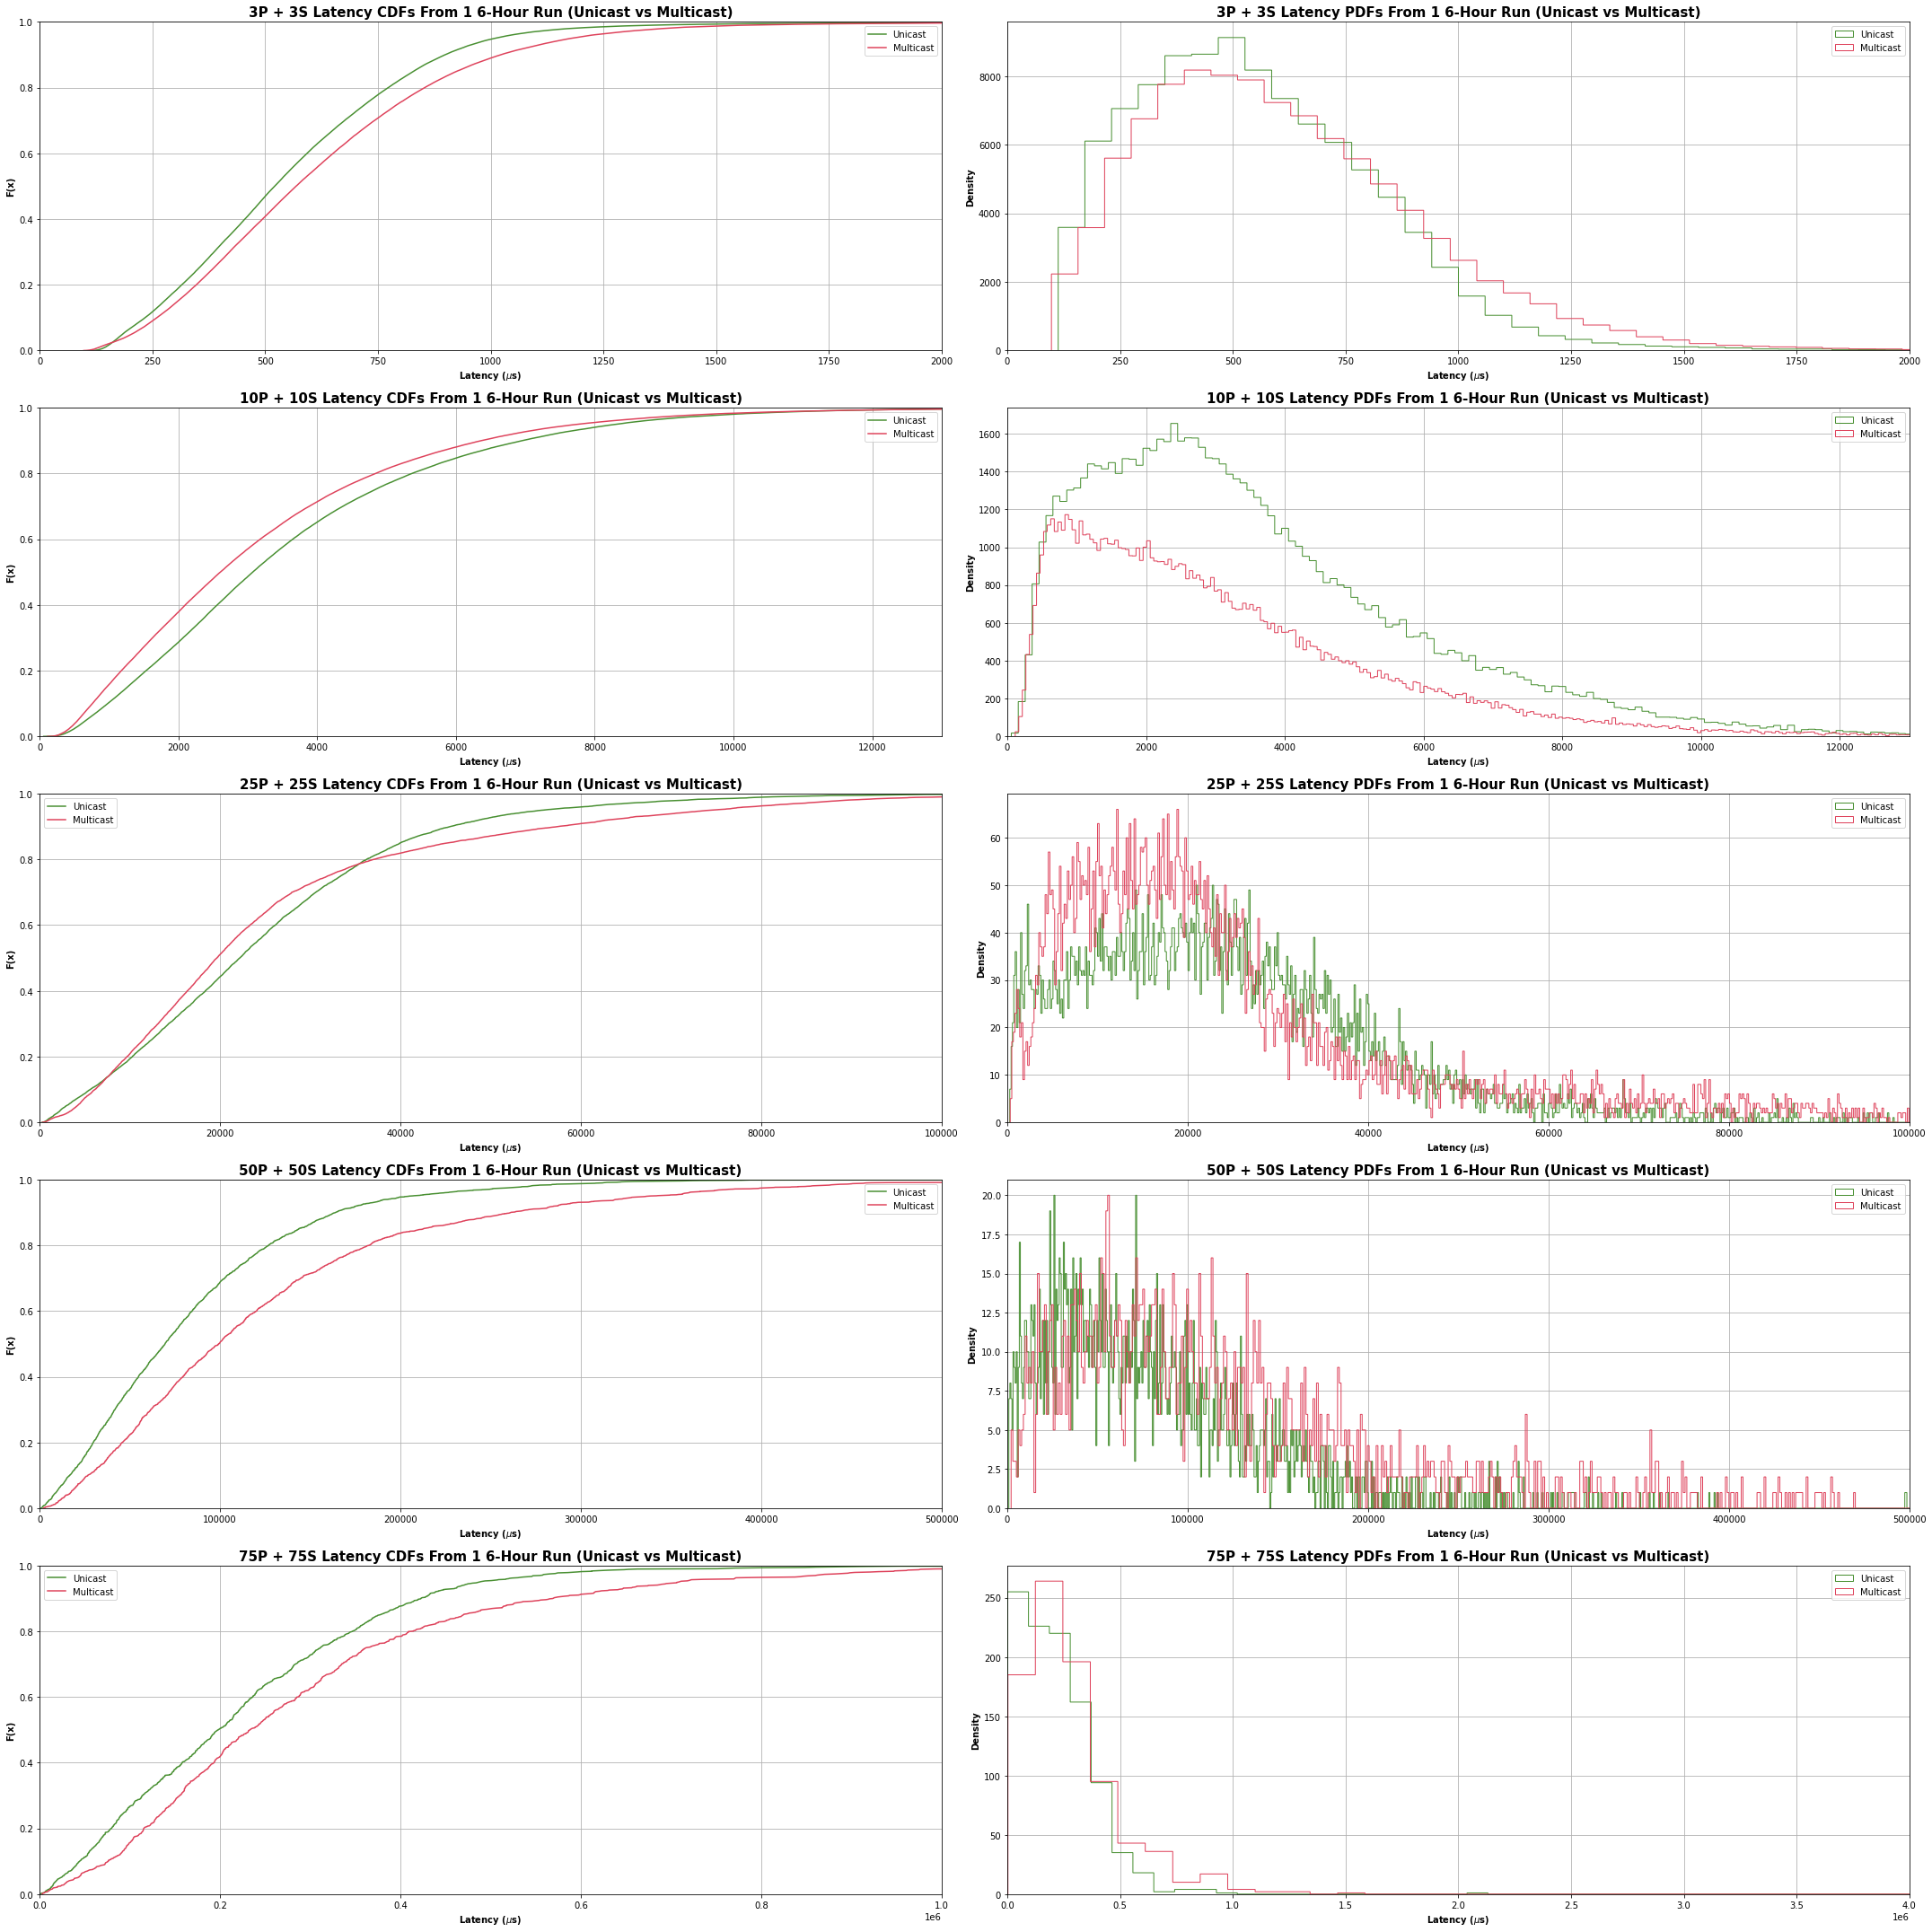

In [64]:
# ---------------------------------------------------------------------------- #
#                                File Collection                               #
# ---------------------------------------------------------------------------- #
s1files = [file for file in get_files("data/v2/set_1") if 'average_latencies' in file]
s1ufiles = [file for file in s1files if 'unicast' in file]
s1mfiles = [file for file in s1files if 'multicast' in file]

v2files = [file for file in get_files("data/v2/set_2") if 'average_latencies' in file]
v2ufiles = [file for file in v2files if 'unicast' in file]
v2mfiles = [file for file in v2files if 'multicast' in file]

# ---------------------------------------------------------------------------- #
#                               Figure Definition                              #
# ---------------------------------------------------------------------------- #
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))

# ---------------------------------------------------------------------------- #
#                             DataFrame Collection                             #
# ---------------------------------------------------------------------------- #
s1u_df = pd.read_csv(s1ufiles[0])["run_1_latency"]
s1m_df = pd.read_csv(s1mfiles[0])["run_1_latency"]

v2u_dfs = {"10p10s": None, "25p25s": None, "50p50s": None, "75p75s": None}
for file in v2ufiles:
    if "10p_10s" in file:
        v2u_dfs["10p10s"] = pd.read_csv(file)["run_1_latency"]
    elif "25p_25s" in file:
        v2u_dfs["25p25s"] = pd.read_csv(file)["run_1_latency"]
    elif "50p_50s" in file:
        v2u_dfs["50p50s"] = pd.read_csv(file)["run_1_latency"]
    elif "75p_75s" in file:
        v2u_dfs["75p75s"] = pd.read_csv(file)["run_1_latency"]
        
v2m_dfs = {"10p10s": None, "25p25s": None, "50p50s": None, "75p75s": None}
for file in v2mfiles:
    if "10p_10s" in file:
        v2m_dfs["10p10s"] = pd.read_csv(file)["run_1_latency"]
    elif "25p_25s" in file:
        v2m_dfs["25p25s"] = pd.read_csv(file)["run_1_latency"]
    elif "50p_50s" in file:
        v2m_dfs["50p50s"] = pd.read_csv(file)["run_1_latency"]
    elif "75p_75s" in file:
        v2m_dfs["75p75s"] = pd.read_csv(file)["run_1_latency"]

# ---------------------------------------------------------------------------- #
#                             Remove NaNs and Infs                             #
# ---------------------------------------------------------------------------- #
s1u_df = s1u_df.replace([np.inf, -np.inf], np.nan).dropna()
s1m_df = s1m_df.replace([np.inf, -np.inf], np.nan).dropna()
for item in v2u_dfs:
    v2u_dfs[item] = v2u_dfs[item].replace([np.inf, -np.inf], np.nan).dropna()
for item in v2m_dfs:
    v2m_dfs[item] = v2m_dfs[item].replace([np.inf, -np.inf], np.nan).dropna()

# ---------------------------------------------------------------------------- #
#                                   CDF Plots                                  #
# ---------------------------------------------------------------------------- #
plot_cdf("Unicast", s1u_df, axes[0, 0], greens[0], "normal")
plot_cdf("Multicast", s1m_df, axes[0, 0], reds[0], "normal")

plot_cdf("Unicast", v2u_dfs["10p10s"], axes[1, 0], greens[0], "normal")
plot_cdf("Unicast", v2u_dfs["25p25s"], axes[2, 0], greens[0], "normal")
plot_cdf("Unicast", v2u_dfs["50p50s"], axes[3, 0], greens[0], "normal")
plot_cdf("Unicast", v2u_dfs["75p75s"], axes[4, 0], greens[0], "normal")

plot_cdf("Multicast", v2m_dfs["10p10s"], axes[1, 0], reds[0], "normal")
plot_cdf("Multicast", v2m_dfs["25p25s"], axes[2, 0], reds[0], "normal")
plot_cdf("Multicast", v2m_dfs["50p50s"], axes[3, 0], reds[0], "normal")
plot_cdf("Multicast", v2m_dfs["75p75s"], axes[4, 0], reds[0], "normal")

# ---------------------------------------------------------------------------- #
#                                   KDE Plots                                  #
# ---------------------------------------------------------------------------- #
plot_hist("Unicast", s1u_df, axes[0, 1], greens[0])
plot_hist("Multicast", s1m_df, axes[0, 1], reds[0])
    
plot_hist("Unicast", v2u_dfs["10p10s"], axes[1, 1], greens[0])
plot_hist("Unicast", v2u_dfs["25p25s"], axes[2, 1], greens[0])
plot_hist("Unicast", v2u_dfs["50p50s"], axes[3, 1], greens[0])
plot_hist("Unicast", v2u_dfs["75p75s"], axes[4, 1], greens[0])

plot_hist("Multicast", v2m_dfs["10p10s"], axes[1, 1], reds[0])
plot_hist("Multicast", v2m_dfs["25p25s"], axes[2, 1], reds[0])
plot_hist("Multicast", v2m_dfs["50p50s"], axes[3, 1], reds[0])
plot_hist("Multicast", v2m_dfs["75p75s"], axes[4, 1], reds[0])

# ---------------------------------------------------------------------------- #
#                                    Titles                                    #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_title("3P + 3S Latency CDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[1, 0].set_title("10P + 10S Latency CDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[2, 0].set_title("25P + 25S Latency CDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[3, 0].set_title("50P + 50S Latency CDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[4, 0].set_title("75P + 75S Latency CDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")

axes[0, 1].set_title("3P + 3S Latency PDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[1, 1].set_title("10P + 10S Latency PDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[2, 1].set_title("25P + 25S Latency PDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[3, 1].set_title("50P + 50S Latency PDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[4, 1].set_title("75P + 75S Latency PDFs From 1 6-Hour Run (Unicast vs Multicast)", fontsize=15, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                   X-Labels                                   #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.set_xlabel("Latency ($\mu$s)", fontsize=10, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                   Y-Labels                                   #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_ylabel("F(x)", fontsize=10, fontweight="bold")
axes[1, 0].set_ylabel("F(x)", fontsize=10, fontweight="bold")
axes[2, 0].set_ylabel("F(x)", fontsize=10, fontweight="bold")
axes[3, 0].set_ylabel("F(x)", fontsize=10, fontweight="bold")
axes[4, 0].set_ylabel("F(x)", fontsize=10, fontweight="bold")

axes[0, 1].set_ylabel("Density", fontsize=10, fontweight="bold")
axes[1, 1].set_ylabel("Density", fontsize=10, fontweight="bold")
axes[2, 1].set_ylabel("Density", fontsize=10, fontweight="bold")
axes[3, 1].set_ylabel("Density", fontsize=10, fontweight="bold")
axes[4, 1].set_ylabel("Density", fontsize=10, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                   Y-Limits                                   #
# ---------------------------------------------------------------------------- #
axes[0, 0].set_ylim(ymin=0, ymax=1)
axes[1, 0].set_ylim(ymin=0, ymax=1)
axes[2, 0].set_ylim(ymin=0, ymax=1)
axes[3, 0].set_ylim(ymin=0, ymax=1)
axes[4, 0].set_ylim(ymin=0, ymax=1)
    
# ---------------------------------------------------------------------------- #
#                                   X-Limits                                   #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.set_xlim(xmin=0)
    
axes[0, 0].set_xlim(xmax=2000)
axes[1, 0].set_xlim(xmax=13000)
axes[2, 0].set_xlim(xmax=100000)
axes[3, 0].set_xlim(xmax=500000)
axes[4, 0].set_xlim(xmax=1000000)

axes[0, 1].set_xlim(xmax=2000)
axes[1, 1].set_xlim(xmax=13000)
axes[2, 1].set_xlim(xmax=100000)
axes[3, 1].set_xlim(xmax=500000)
axes[4, 1].set_xlim(xmax=4000000)
    
# ---------------------------------------------------------------------------- #
#                                     Grids                                    #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.grid()

# ---------------------------------------------------------------------------- #
#                                    Legends                                   #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.legend()

# ---------------------------------------------------------------------------- #
#                                 Code Archive                                 #
# ---------------------------------------------------------------------------- #


# v2u_dfs["10p10s"].plot.kde(ax = axes[0, 1], ind=np.arange(0, 15000, 1), color=greens[0], label="Unicast")
# v2u_dfs["25p25s"].plot.kde(ax = axes[1, 1], ind=np.arange(0, 15000, 1), color=greens[0], label="Unicast")
# v2u_dfs["50p50s"].plot.kde(ax = axes[2, 1], ind=np.arange(0, 15000, 1), color=greens[0], label="Unicast")
# v2u_dfs["75p75s"].plot.kde(ax = axes[3, 1], ind=np.arange(0, 15000, 1), color=greens[0], label="Unicast")

# v2m_dfs["10p10s"].plot.kde(ax = axes[0, 1], ind=np.arange(0, 15000, 1), color=reds[0], label="Multicast")
# v2m_dfs["25p25s"].plot.kde(ax = axes[1, 1], ind=np.arange(0, 15000, 1), color=reds[0], label="Multicast")
# v2m_dfs["50p50s"].plot.kde(ax = axes[2, 1], ind=np.arange(0, 15000, 1), color=reds[0], label="Multicast")
# v2m_dfs["75p75s"].plot.kde(ax = axes[3, 1], ind=np.arange(0, 15000, 1), color=reds[0], label="Multicast")

plt.tight_layout()

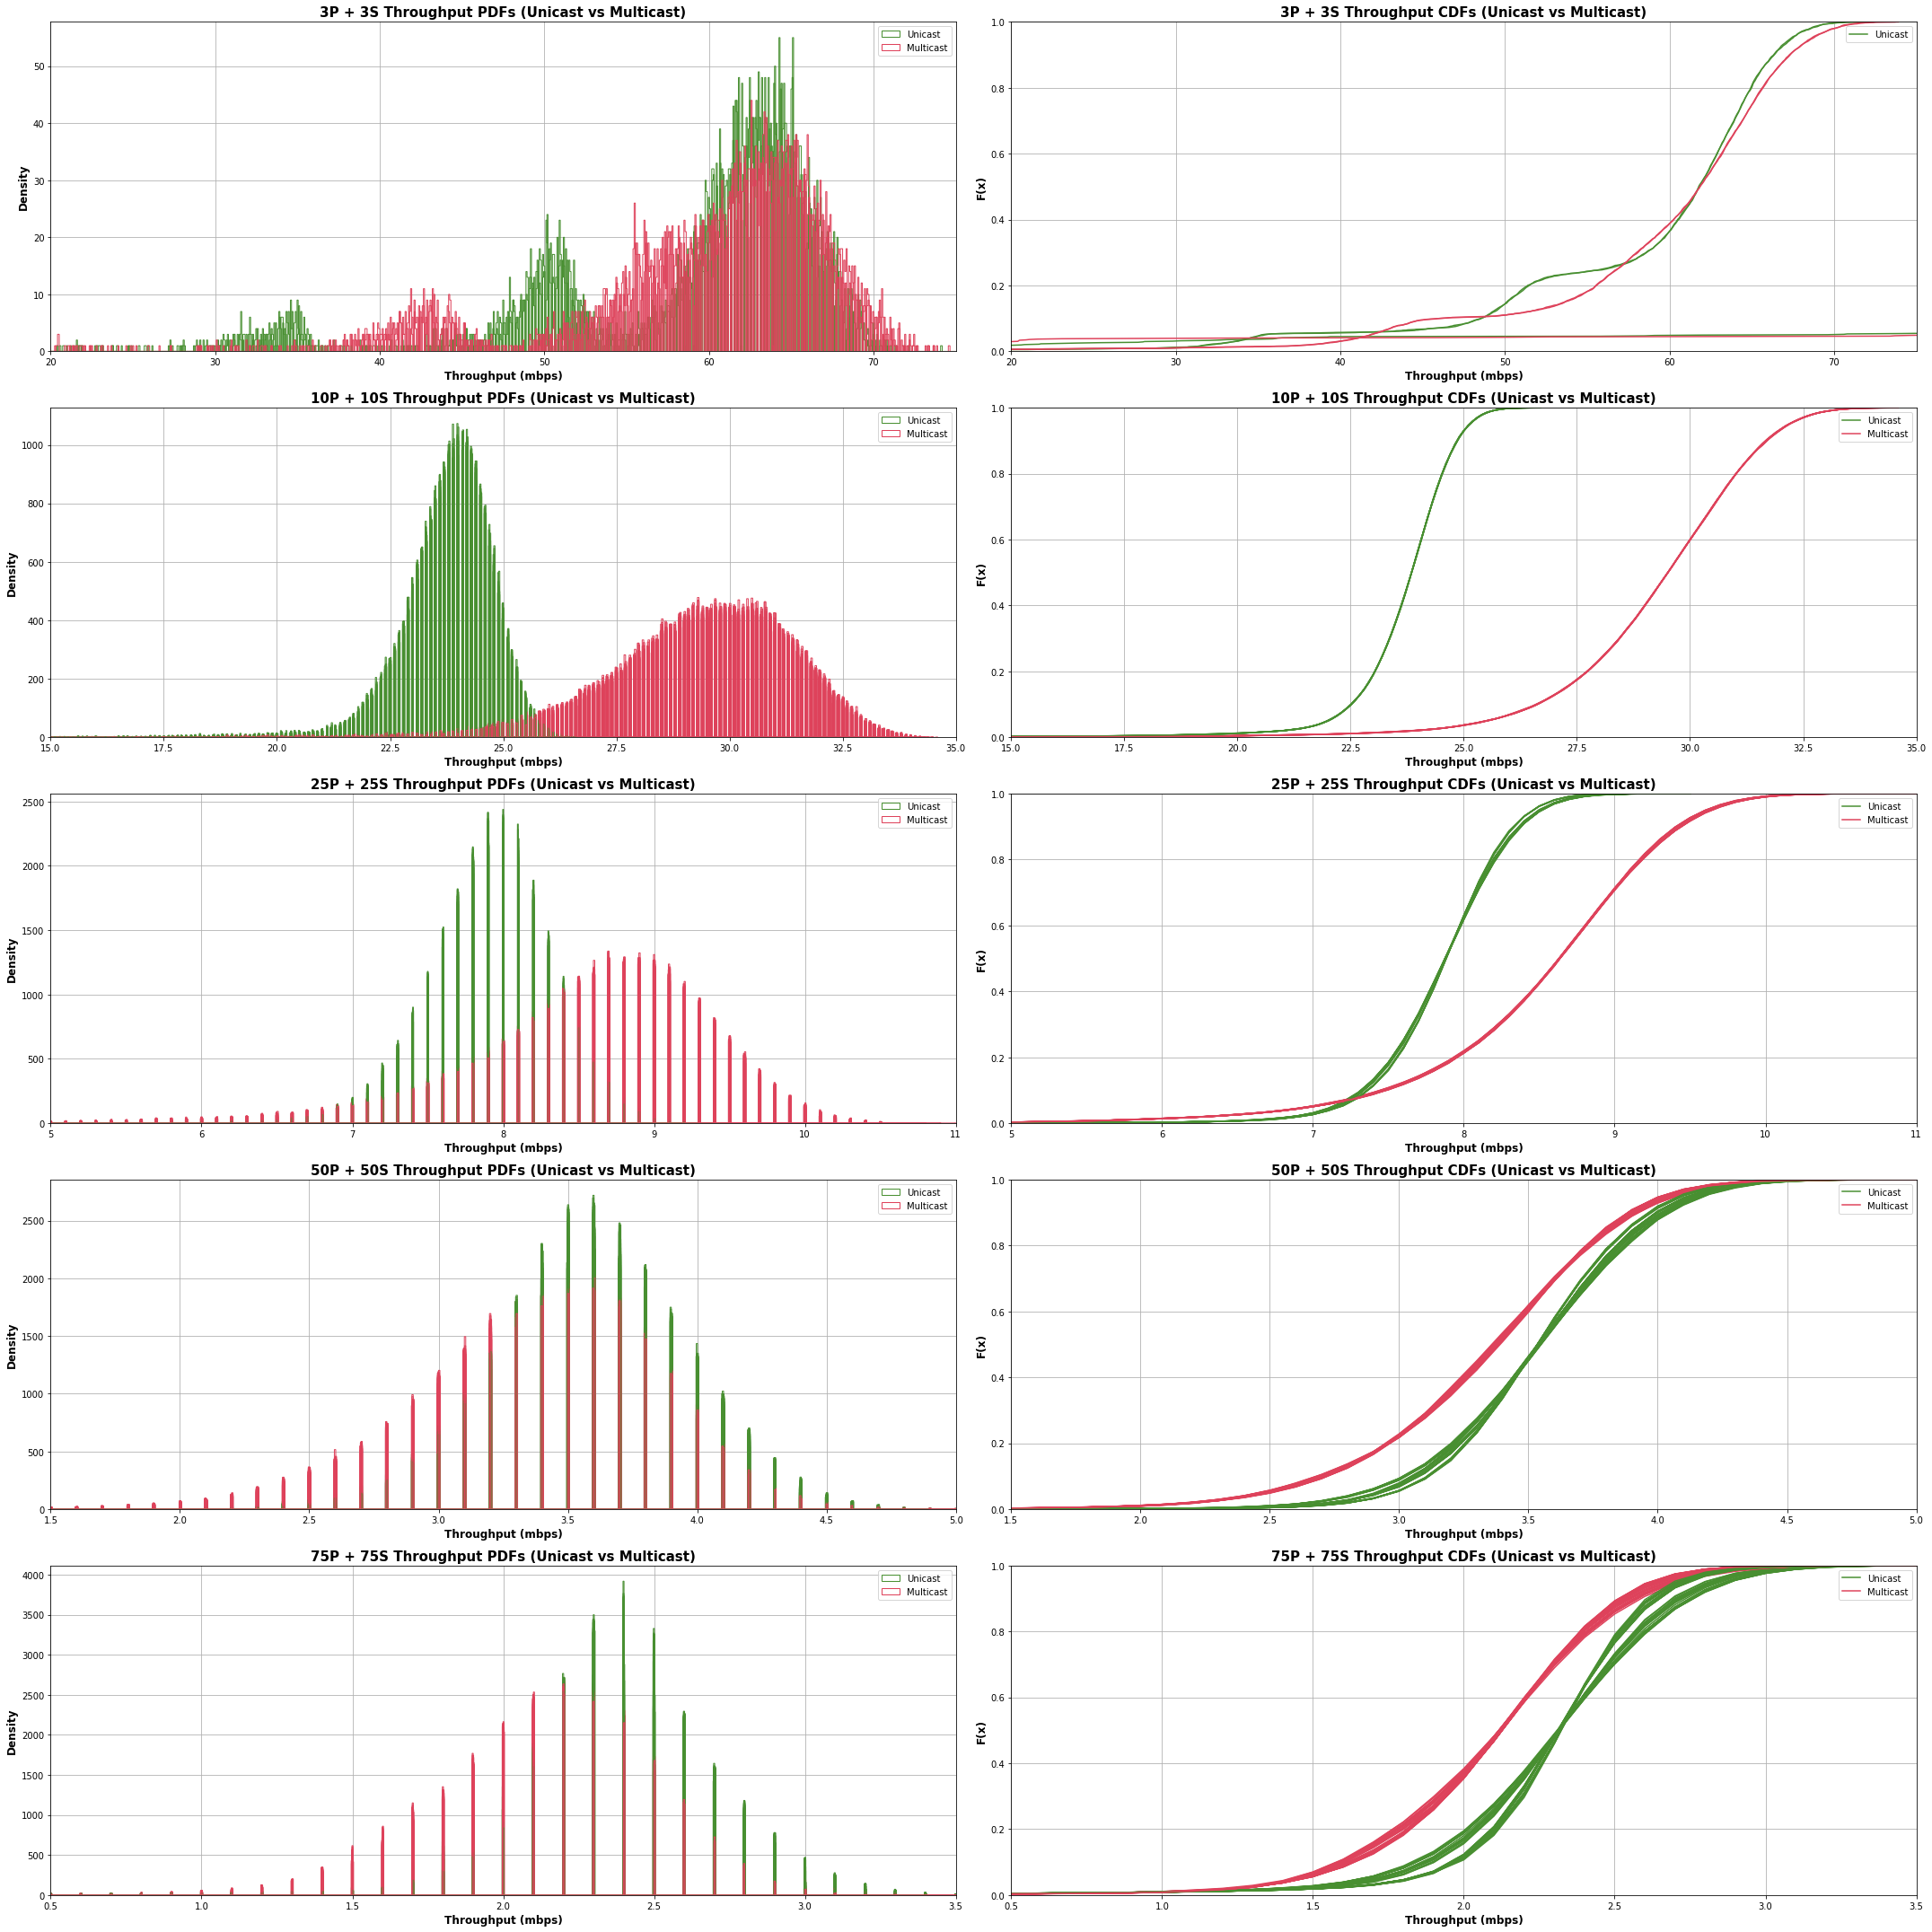

In [65]:
# ---------------------------------------------------------------------------- #
#                             Function Definitions                             #
# ---------------------------------------------------------------------------- #
def get_tp_data(files):
    tps = {}
    for sub in get_tp_subs(files):
        tps[sub] = []
        
    """
    For each file:
        For each sub:
            Get average throughputs
    """
    for sub, file in zip(get_tp_subs(files), files):
        df = pd.read_csv(file)
        tps[sub] = df["avg_run_throughput"]
    """
    Return Example:
    {
        "sub_0": [1, 2, 3, ...],
        "sub_1": [1, 2, 3, ...],
        "sub_2": [1, 2, 3, ...]
    }
    
    """
    return tps
def get_tp_subs(files):
    return ["sub_" + file.split("sub_")[1].split("_output")[0] for file in files]

# ---------------------------------------------------------------------------- #
#                                File Collection                               #
# ---------------------------------------------------------------------------- #
s1_files = [file for file in get_files("data/v2/set_1") if 'average_throughput' in file]
s1u_files = [file for file in s1_files if 'unicast' in file]
s1m_files = [file for file in s1_files if 'multicast' in file]

v2files = [file for file in get_files("data/v2/set_2") if 'average_throughput' in file]
v2ufiles = [file for file in v2files if 'unicast' in file]
v2mfiles = [file for file in v2files if 'multicast' in file]

v2ufiles_organised = {
    "10p10s": [file for file in v2ufiles if "10p_10s" in file],
    "25p25s": [file for file in v2ufiles if "25p_25s" in file],
    "50p50s": [file for file in v2ufiles if "50p_50s" in file],
    "75p75s": [file for file in v2ufiles if "75p_75s" in file]
}

v2mfiles_organised = {
    "10p10s": [file for file in v2mfiles if "10p_10s" in file],
    "25p25s": [file for file in v2mfiles if "25p_25s" in file],
    "50p50s": [file for file in v2mfiles if "50p_50s" in file],
    "75p75s": [file for file in v2mfiles if "75p_75s" in file]
}

# ---------------------------------------------------------------------------- #
#                                Data Collection                               #
# ---------------------------------------------------------------------------- #
s1udf = get_tp_data(s1u_files)
s1mdf = get_tp_data(s1m_files)

v2u_tp_dfs = {
    "10p10s": get_tp_data(v2ufiles_organised["10p10s"]),
    "25p25s": get_tp_data(v2ufiles_organised["25p25s"]),
    "50p50s": get_tp_data(v2ufiles_organised["50p50s"]),
    "75p75s": get_tp_data(v2ufiles_organised["75p75s"])
}
v2m_tp_dfs = {
    "10p10s": get_tp_data(v2mfiles_organised["10p10s"]),
    "25p25s": get_tp_data(v2mfiles_organised["25p25s"]),
    "50p50s": get_tp_data(v2mfiles_organised["50p50s"]),
    "75p75s": get_tp_data(v2mfiles_organised["75p75s"])
}

# ---------------------------------------------------------------------------- #
#                               Figure Definition                              #
# ---------------------------------------------------------------------------- #
# fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 30))
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))

# ---------------------------------------------------------------------------- #
#                                  Line Plots                                  #
# ---------------------------------------------------------------------------- #
# for col in v2u_tp_dfs["10p10s"]:
#     axes[1, 0].plot(v2u_tp_dfs["10p10s"][col], color=greens[0])
#     axes[1, 0].plot(v2m_tp_dfs["10p10s"][col], color=reds[0])
# for col in v2u_tp_dfs["25p25s"]:
#     axes[2, 0].plot(v2u_tp_dfs["25p25s"][col], color=greens[0])
#     axes[2, 0].plot(v2m_tp_dfs["25p25s"][col], color=reds[0])
# for col in v2u_tp_dfs["50p50s"]:
#     axes[3, 0].plot(v2u_tp_dfs["50p50s"][col], color=greens[0])
#     axes[3, 0].plot(v2m_tp_dfs["50p50s"][col], color=reds[0])
# for col in v2u_tp_dfs["75p75s"]:
#     axes[4, 0].plot(v2u_tp_dfs["75p75s"][col], color=greens[0])
#     axes[4, 0].plot(v2m_tp_dfs["75p75s"][col], color=reds[0])
    
# ---------------------------------------------------------------------------- #
#                                   PDF Plots                                  #
# ---------------------------------------------------------------------------- #
ulabel = ""
mlabel = ""
for col in s1udf:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_hist(ulabel, s1udf[col], axes[0, 0], greens[0])
for col in s1mdf:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_hist(mlabel, s1mdf[col], axes[0, 0], reds[0])
    
for col in v2u_tp_dfs["10p10s"]:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_hist(ulabel, v2u_tp_dfs["10p10s"][col], axes[1, 0], greens[0])
    plot_hist(mlabel, v2m_tp_dfs["10p10s"][col], axes[1, 0], reds[0])
for col in v2u_tp_dfs["25p25s"]:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_hist(ulabel, v2u_tp_dfs["25p25s"][col], axes[2, 0], greens[0])
    plot_hist(mlabel, v2m_tp_dfs["25p25s"][col], axes[2, 0], reds[0])
for col in v2u_tp_dfs["50p50s"]:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_hist(ulabel, v2u_tp_dfs["50p50s"][col], axes[3, 0], greens[0])
    plot_hist(mlabel, v2m_tp_dfs["50p50s"][col], axes[3, 0], reds[0])
for col in v2u_tp_dfs["75p75s"]:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_hist(ulabel, v2u_tp_dfs["75p75s"][col], axes[4, 0], greens[0])
    plot_hist(mlabel, v2m_tp_dfs["75p75s"][col], axes[4, 0], reds[0])
    
# ---------------------------------------------------------------------------- #
#                                   CDF Plots                                  #
# ---------------------------------------------------------------------------- #
ulabel = ""
mlabel = ""
for col in s1udf:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_cdf(ulabel, s1udf[col], axes[0, 1], greens[0], "normal")    
for col in s1mdf:
    plot_cdf(mlabel, s1mdf[col], axes[0, 1], reds[0], "normal")
    
for col in v2u_tp_dfs["10p10s"]:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_cdf(ulabel, v2u_tp_dfs["10p10s"][col], axes[1, 1], greens[0], "normal")
    plot_cdf(mlabel, v2m_tp_dfs["10p10s"][col], axes[1, 1], reds[0], "normal")
for col in v2u_tp_dfs["25p25s"]:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_cdf(ulabel, v2u_tp_dfs["25p25s"][col], axes[2, 1], greens[0], "normal")
    plot_cdf(mlabel, v2m_tp_dfs["25p25s"][col], axes[2, 1], reds[0], "normal")
for col in v2u_tp_dfs["50p50s"]:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_cdf(ulabel, v2u_tp_dfs["50p50s"][col], axes[3, 1], greens[0], "normal")
    plot_cdf(mlabel, v2m_tp_dfs["50p50s"][col], axes[3, 1], reds[0], "normal")
for col in v2u_tp_dfs["75p75s"]:
    if "sub_0" in col:
        ulabel = "Unicast"
        mlabel = "Multicast"
    else:
        ulabel = ""
        mlabel = ""
    plot_cdf(ulabel, v2u_tp_dfs["75p75s"][col], axes[4, 1], greens[0], "normal")
    plot_cdf(mlabel, v2m_tp_dfs["75p75s"][col], axes[4, 1], reds[0], "normal")
    
# ---------------------------------------------------------------------------- #
#                                 Graph Titles                                 #
# ---------------------------------------------------------------------------- #
# axes[0, 0].set_title("3P + 3S Throughputs Over Time (Unicast vs Multicast)", fontsize=15, fontweight="bold")
# axes[1, 0].set_title("10P + 10S Throughputs Over Time (Unicast vs Multicast)", fontsize=15, fontweight="bold")
# axes[2, 0].set_title("25P + 25S Throughputs Over Time (Unicast vs Multicast)", fontsize=15, fontweight="bold")
# axes[3, 0].set_title("50P + 50S Throughputs Over Time (Unicast vs Multicast)", fontsize=15, fontweight="bold")
# axes[4, 0].set_title("75P + 75S Throughputs Over Time (Unicast vs Multicast)", fontsize=15, fontweight="bold")

axes[0, 0].set_title("3P + 3S Throughput PDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[1, 0].set_title("10P + 10S Throughput PDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[2, 0].set_title("25P + 25S Throughput PDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[3, 0].set_title("50P + 50S Throughput PDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[4, 0].set_title("75P + 75S Throughput PDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")

axes[0, 1].set_title("3P + 3S Throughput CDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[1, 1].set_title("10P + 10S Throughput CDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[2, 1].set_title("25P + 25S Throughput CDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[3, 1].set_title("50P + 50S Throughput CDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")
axes[4, 1].set_title("75P + 75S Throughput CDFs (Unicast vs Multicast)", fontsize=15, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                   Y-Limits                                   #
# ---------------------------------------------------------------------------- #
for ax in [axes[0, 1], axes[1, 1], axes[2, 1], axes[3, 1], axes[4, 1]]:
    ax.set_ylim(ymin=0, ymax=1)

# ---------------------------------------------------------------------------- #
#                                   X-Limits                                   #
# ---------------------------------------------------------------------------- #
for ax in [axes[0, 0], axes[0, 1]]:
    ax.set_xlim(xmin=20, xmax=75)
for ax in [axes[1, 0], axes[1, 1]]:
    ax.set_xlim(xmin=15, xmax=35)
for ax in [axes[2, 0], axes[2, 1]]:
    ax.set_xlim(xmin=5, xmax=11)
for ax in [axes[3, 0], axes[3, 1]]:
    ax.set_xlim(xmin=1.5, xmax=5)
for ax in [axes[4, 0], axes[4, 1]]:
    ax.set_xlim(xmin=0.5, xmax=3.5)

# ---------------------------------------------------------------------------- #
#                                   Y-Labels                                   #
# ---------------------------------------------------------------------------- #
# for ax in [axes[0, 0], axes[1, 0], axes[2, 0], axes[3, 0], axes[4, 0]]:             # First Column
    # ax.set_ylabel("Throughputs (mbps)", fontsize=12, fontweight="bold")
    
for ax in [axes[0, 0], axes[1, 0], axes[2, 0], axes[3, 0], axes[4, 0]]:             # Second Column
    ax.set_ylabel("Density", fontsize=12, fontweight="bold")
    
for ax in [axes[0, 1], axes[1, 1], axes[2, 1], axes[3, 1], axes[4, 1]]:             # Third Column
    ax.set_ylabel("F(x)", fontsize=12, fontweight="bold")
    
# ---------------------------------------------------------------------------- #
#                                   X-Labels                                   #
# ---------------------------------------------------------------------------- #
# for ax in [axes[0, 0], axes[1, 0], axes[2, 0], axes[3, 0], axes[4, 0]]:             # First Column
    # ax.set_xlabel("Time (s)", fontsize=12, fontweight="bold")
    
for ax in [axes[0, 0], axes[1, 0], axes[2, 0], axes[3, 0], axes[4, 0]]:             # Second Column
    ax.set_xlabel("Throughput (mbps)", fontsize=12, fontweight="bold")
    
for ax in [axes[0, 1], axes[1, 1], axes[2, 1], axes[3, 1], axes[4, 1]]:             # Third Column
    ax.set_xlabel("Throughput (mbps)", fontsize=12, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                     Grid                                     #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.grid()
    
# ---------------------------------------------------------------------------- #
#                                    Legends                                   #
# ---------------------------------------------------------------------------- #
for ax in axes.ravel():
    ax.legend()

plt.tight_layout()

# Set 5: Multicast Intermediary

## Latency Comparison: 25P + 10/25/50S

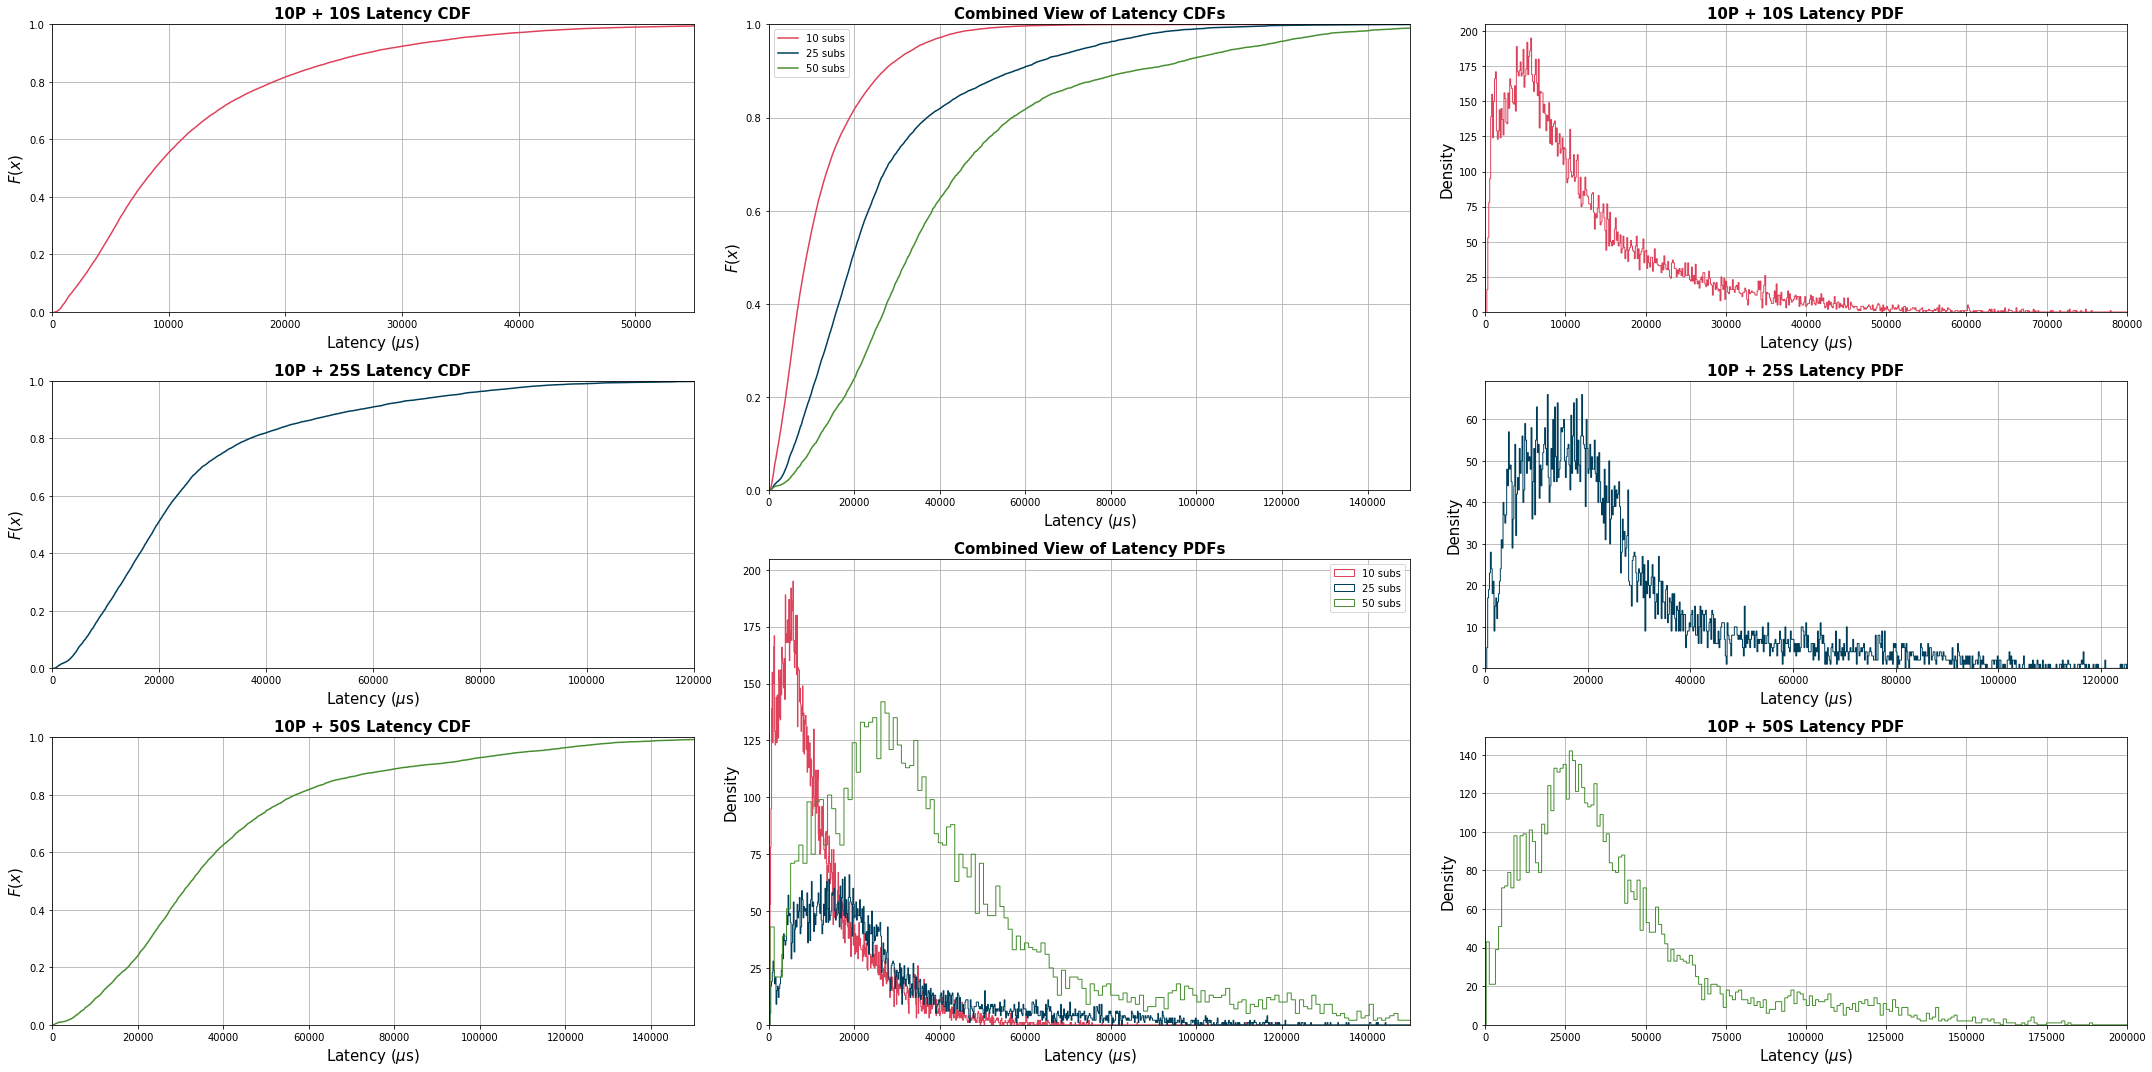

In [27]:
# ---------------------------------------------------------------------------- #
#                                   Functions                                  #
# ---------------------------------------------------------------------------- #
def remove_infs_nans(df):
    return df.replace([np.inf, -np.inf], np.nan).dropna()

# ---------------------------------------------------------------------------- #
#                                   Get Files                                  #
# ---------------------------------------------------------------------------- #
s2_lat_files = [file for file in get_files("data/v2/set_2") if 'average_latencies' in file and '2_6_multicast' in file]

s5_files = [file for file in get_files("data/v2/set_5") if 'average_' in file]
s5_lat_files = [file for file in s5_files if 'latencies' in file]

s2_tp_files = [file for file in get_files("data/v2/set_2") if 'average_throughput' in file and '2_6_multicast' in file]
s5_tp_files = [file for file in s5_files if 'throughput' in file]

lat_10s_file = [file for file in s5_lat_files if '10s' in file][0]
lat_25s_file = [file for file in s2_lat_files][0]
lat_50s_file = [file for file in s5_lat_files if '50s' in file][0]

# ---------------------------------------------------------------------------- #
#                                  DataFrames                                  #
# ---------------------------------------------------------------------------- #
latdf_10s = remove_infs_nans(pd.read_csv(lat_10s_file)["run_1_latency"])
latdf_25s = remove_infs_nans(pd.read_csv(lat_25s_file)["run_1_latency"])
latdf_50s = remove_infs_nans(pd.read_csv(lat_50s_file)["run_1_latency"])

# ---------------------------------------------------------------------------- #
#                                Figure Creation                               #
# ---------------------------------------------------------------------------- #
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
fig = plt.figure(figsize=(30, 15))

# ---------------------------------------------------------------------------- #
#                                 Grid Creation                                #
# ---------------------------------------------------------------------------- #
grid = plt.GridSpec(6, 6, figure=fig)

left_top = plt.subplot(grid[0:2, 0:2])
left_mid = plt.subplot(grid[2:4, 0:2])
left_bot = plt.subplot(grid[4:6, 0:2])

mid_top = plt.subplot(grid[0:3, 2:4])
mid_bot = plt.subplot(grid[3:6, 2:4])

right_top = plt.subplot(grid[0:2, 4:6])
right_mid = plt.subplot(grid[2:4, 4:6])
right_bot = plt.subplot(grid[4:6, 4:6])

all = [left_top, left_mid, left_bot, mid_top, mid_bot, right_top, right_mid, right_bot]
left_col = [left_top, left_mid, left_bot]
right_col = [right_top, right_mid, right_bot]

# ---------------------------------------------------------------------------- #
#                                 Graph Titles                                 #
# ---------------------------------------------------------------------------- #
left_top.set_title("10P + 10S Latency CDF", fontsize=15, fontweight="bold")
left_mid.set_title("10P + 25S Latency CDF", fontsize=15, fontweight="bold")
left_bot.set_title("10P + 50S Latency CDF", fontsize=15, fontweight="bold")

mid_top.set_title("Combined View of Latency CDFs", fontsize=15, fontweight="bold")
mid_bot.set_title("Combined View of Latency PDFs", fontsize=15, fontweight="bold")

right_top.set_title("10P + 10S Latency PDF", fontsize=15, fontweight="bold")
right_mid.set_title("10P + 25S Latency PDF", fontsize=15, fontweight="bold")
right_bot.set_title("10P + 50S Latency PDF", fontsize=15, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                     CDFs                                     #
# ---------------------------------------------------------------------------- #
plot_cdf("", latdf_10s, left_top, reds[0], "normal")
plot_cdf("", latdf_25s, left_mid, blues[0], "normal")
plot_cdf("", latdf_50s, left_bot, greens[0], "normal")

plot_cdf("10 subs", latdf_10s, mid_top, reds[0], "normal")
plot_cdf("25 subs", latdf_25s, mid_top, blues[0], "normal")
plot_cdf("50 subs", latdf_50s, mid_top, greens[0], "normal")

# ---------------------------------------------------------------------------- #
#                                     PDFs                                     #
# ---------------------------------------------------------------------------- #
plot_hist("", latdf_10s, right_top, reds[0])
plot_hist("", latdf_25s, right_mid, blues[0])
plot_hist("", latdf_50s, right_bot, greens[0])

plot_hist("10 subs", latdf_10s, mid_bot, reds[0])
plot_hist("25 subs", latdf_25s, mid_bot, blues[0])
plot_hist("50 subs", latdf_50s, mid_bot, greens[0])

# ---------------------------------------------------------------------------- #
#                                   X-Labels                                   #
# ---------------------------------------------------------------------------- #
for ax in all:
    ax.set_xlabel("Latency ($\mu$s)", fontsize=15)

# ---------------------------------------------------------------------------- #
#                                   Y-Labels                                   #
# ---------------------------------------------------------------------------- #
for ax in left_col:
    ax.set_ylabel("$F(x)$", fontsize=15)

for ax in right_col:
    ax.set_ylabel("Density", fontsize=15)
    
mid_top.set_ylabel("$F(x)$", fontsize=15)
mid_bot.set_ylabel("Density", fontsize=15)

# ---------------------------------------------------------------------------- #
#                                    Legends                                   #
# ---------------------------------------------------------------------------- #
mid_top.legend()
mid_bot.legend()

# ---------------------------------------------------------------------------- #
#                                   Y-Limits                                   #
# ---------------------------------------------------------------------------- #
for ax in left_col:
    ax.set_ylim(ymin=0, ymax=1)
mid_top.set_ylim(ymin=0, ymax=1)
    
# ---------------------------------------------------------------------------- #
#                                   X-Limits                                   #
# ---------------------------------------------------------------------------- #
left_top.set_xlim(xmin=0, xmax=55000)
left_mid.set_xlim(xmin=0, xmax=120000)
left_bot.set_xlim(xmin=0, xmax=150000)

mid_top.set_xlim(xmin=0, xmax=150000)
mid_bot.set_xlim(xmin=0, xmax=150000)

right_top.set_xlim(xmin=0, xmax=80000)
right_mid.set_xlim(xmin=0, xmax=125000)
right_bot.set_xlim(xmin=0, xmax=200000)

# ---------------------------------------------------------------------------- #
#                                     Grid                                     #
# ---------------------------------------------------------------------------- #
for ax in all:
    ax.grid()

plt.tight_layout()


def ucast_vs_mcast_cdfs():
    # ---------------------------------------------------------------------------- #
    #                                File Gathering                                #
    # ---------------------------------------------------------------------------- #
    lats = [file for file in get_files("data/v2/set_2") if "average_latencies" in file]
    ucast_lats = {
        "10p10s": [file for file in lats if "10p_10s" in file and "unicast" in file],
        "25p25s": [file for file in lats if "25p_25s" in file and "unicast" in file],
        "50p50s": [file for file in lats if "50p_50s" in file and "unicast" in file],
        "75p75s": [file for file in lats if "75p_75s" in file and "unicast" in file]
    }
    mcast_lats = {
        "10p10s": [file for file in lats if "10p_10s" in file and "multicast" in file],
        "25p25s": [file for file in lats if "25p_25s" in file and "multicast" in file],
        "50p50s": [file for file in lats if "50p_50s" in file and "multicast" in file],
        "75p75s": [file for file in lats if "75p_75s" in file and "multicast" in file]
    }

    # ---------------------------------------------------------------------------- #
    #                                  Data Frames                                 #
    # ---------------------------------------------------------------------------- #
    ucast_dfs = {}
    mcast_dfs = {}
    for item in ucast_lats:
        ucast_dfs[item] = (remove_infs_nans(pd.read_csv(ucast_lats[item][0])["run_1_latency"]) / 1000).to_frame('latency')['latency']
        mcast_dfs[item] = (remove_infs_nans(pd.read_csv(mcast_lats[item][0])["run_1_latency"]) / 1000).to_frame('latency')['latency']
    
    combined = {
        "u10p10s": ucast_dfs["10p10s"],
        "m10p10s": mcast_dfs["10p10s"],
        "u25p25s": ucast_dfs["25p25s"],
        "m25p25s": mcast_dfs["25p25s"],
        "u50p50s": ucast_dfs["50p50s"],
        "m50p50s": mcast_dfs["50p50s"],
        "u75p75s": ucast_dfs["75p75s"],
        "m75p75s": mcast_dfs["75p75s"]
    }
    
    # ---------------------------------------------------------------------------- #
    #                                    Figure                                    #
    # ---------------------------------------------------------------------------- #
    fig = plt.figure(figsize=(30, 20))
    
    # ---------------------------------------------------------------------------- #
    #                                     Grid                                     #
    # ---------------------------------------------------------------------------- #
    grid = plt.GridSpec(4, 4, figure=fig)
    
    top0 = plt.subplot(grid[0, 0])
    top1 = plt.subplot(grid[0, 1])
    top2 = plt.subplot(grid[0, 2])
    top3 = plt.subplot(grid[0, 3])
    
    main = plt.subplot(grid[1:4, 0:4])
    
    # ---------------------------------------------------------------------------- #
    #                                     CDFs                                     #
    # ---------------------------------------------------------------------------- #
    for item in ucast_dfs:
        if "10" in item:
            ax = top0
            title = "10P + 10S Unicast vs Multicast Latency CDF"
        elif "25" in item:
            ax = top1
            title = "25P + 25S Unicast vs Multicast Latency CDF"
        elif "50" in item:
            ax = top2
            title = "50P + 50S Unicast vs Multicast Latency CDF"
        elif "75" in item:
            ax = top3
            title = "75P + 75S Unicast vs Multicast Latency CDF"
        ax.set_title(title, fontsize=12, fontweight="bold")
        plot_cdf("Unicast", ucast_dfs[item], ax, greens[0], 'normal')
        plot_cdf("Multicast", mcast_dfs[item], ax, reds[0], 'normal')
        plot_cdf(item + " Unicast", ucast_dfs[item], main, greens[0], 'normal')
        plot_cdf(item + " Multicast", mcast_dfs[item], main, reds[0], 'normal')
        ax.legend()
        ax.grid(color="#ddd")
        ax.set_ylim(ymin=0, ymax=1)
        ax.set_ylabel("$F(x)$")
        ax.set_xlabel("Latency (ms)")
    # ---------------------------------------------------------------------------- #
    #                                   X-Limits                                   #
    # ---------------------------------------------------------------------------- #
    top0.set_xlim(xmin=0, xmax=13)
    top1.set_xlim(xmin=0, xmax=100)
    top2.set_xlim(xmin=0, xmax=500)
    top3.set_xlim(xmin=0, xmax=1250)
    
    # ---------------------------------------------------------------------------- #
    #                                 Main Settings                                #
    # ---------------------------------------------------------------------------- #
    main.set_ylabel("$F(x)$")
    main.set_xlabel("Latency (ms)")
    main.set_ylim(ymin=0, ymax=1)
    main.set_xlim(xmin=0, xmax=1000)
    main.grid(color="#ddd")

Exception: Error getting test names for set with number greater than 4.

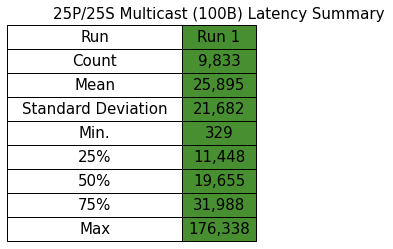

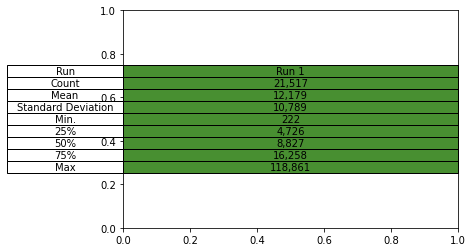

In [39]:
plot_lat_summary_table(s2_lat_files)
plot_lat_summary_table(s5_lat_files)

## Throughput Comparison: 10P + 10/25/50S

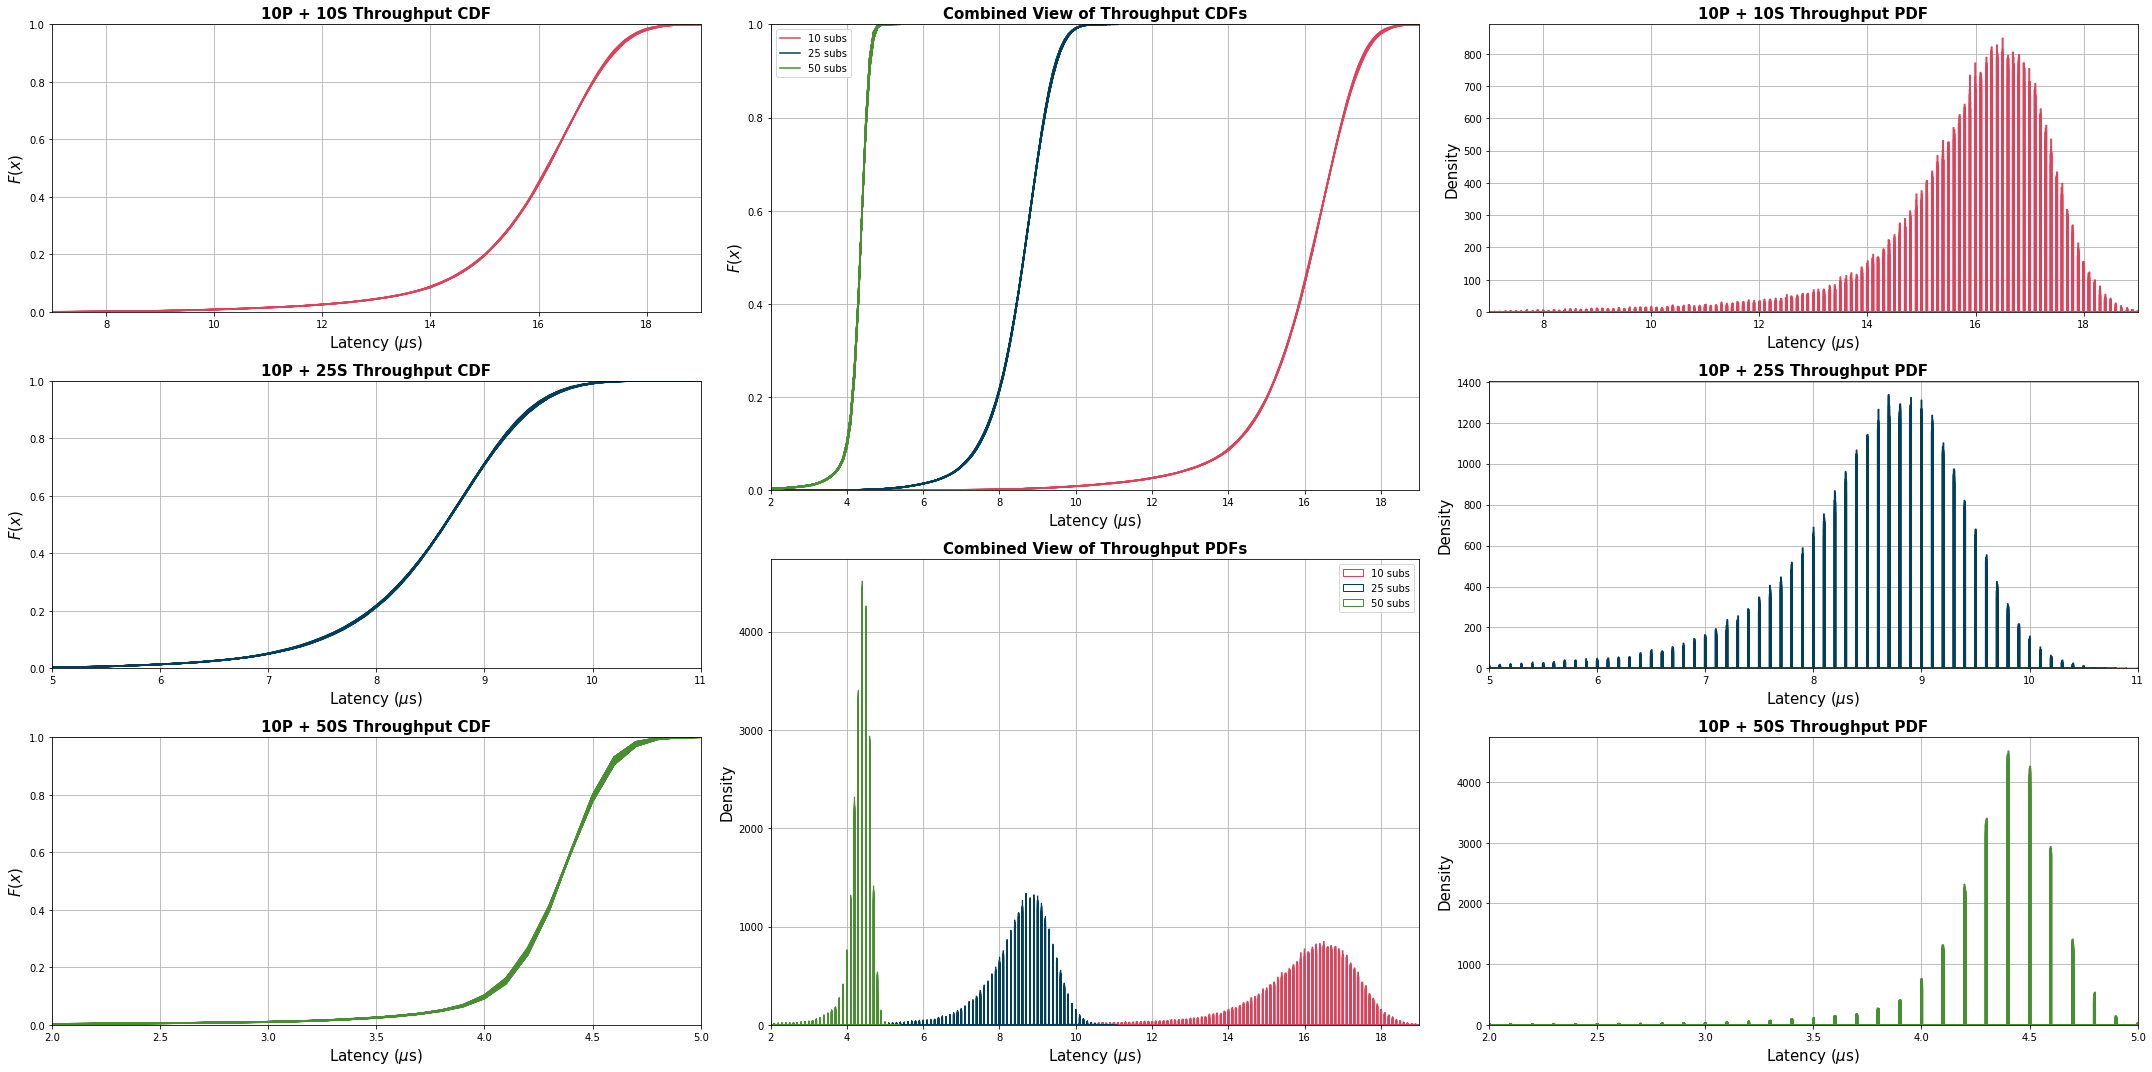

In [37]:
# ---------------------------------------------------------------------------- #
#                                File Collection                               #
# ---------------------------------------------------------------------------- #
tp_files_10s = [file for file in s5_tp_files if '10s' in file]
tp_files_25s = s2_tp_files
tp_files_50s = [file for file in s5_tp_files if '50s' in file]

# ---------------------------------------------------------------------------- #
#                                  DataFrames                                  #
# ---------------------------------------------------------------------------- #
tp_df_10s = get_tp_data(tp_files_10s)
tp_df_25s = get_tp_data(tp_files_25s)
tp_df_50s = get_tp_data(tp_files_50s)

# ---------------------------------------------------------------------------- #
#                                    Asserts                                   #
# ---------------------------------------------------------------------------- #
assert len(tp_df_10s) == 10, "There are more than 10 files in tp_df_10s"
assert len(tp_df_25s) == 25, "There are more than 25 files in tp_df_25s"
assert len(tp_df_50s) == 50, "There are more than 50 files in tp_df_50s"

# ---------------------------------------------------------------------------- #
#                                    Figure                                    #
# ---------------------------------------------------------------------------- #
fig = plt.figure(figsize=(30, 15))

# ---------------------------------------------------------------------------- #
#                                 Grid Creation                                #
# ---------------------------------------------------------------------------- #
grid = plt.GridSpec(6, 6, figure=fig)

left_top = plt.subplot(grid[0:2, 0:2])
left_mid = plt.subplot(grid[2:4, 0:2])
left_bot = plt.subplot(grid[4:6, 0:2])

mid_top = plt.subplot(grid[0:3, 2:4])
mid_bot = plt.subplot(grid[3:6, 2:4])

right_top = plt.subplot(grid[0:2, 4:6])
right_mid = plt.subplot(grid[2:4, 4:6])
right_bot = plt.subplot(grid[4:6, 4:6])

all = [left_top, left_mid, left_bot, mid_top, mid_bot, right_top, right_mid, right_bot]
left_col = [left_top, left_mid, left_bot]
right_col = [right_top, right_mid, right_bot]

# ---------------------------------------------------------------------------- #
#                                 Graph Titles                                 #
# ---------------------------------------------------------------------------- #
left_top.set_title("10P + 10S Throughput CDF", fontsize=15, fontweight="bold")
left_mid.set_title("10P + 25S Throughput CDF", fontsize=15, fontweight="bold")
left_bot.set_title("10P + 50S Throughput CDF", fontsize=15, fontweight="bold")

mid_top.set_title("Combined View of Throughput CDFs", fontsize=15, fontweight="bold")
mid_bot.set_title("Combined View of Throughput PDFs", fontsize=15, fontweight="bold")

right_top.set_title("10P + 10S Throughput PDF", fontsize=15, fontweight="bold")
right_mid.set_title("10P + 25S Throughput PDF", fontsize=15, fontweight="bold")
right_bot.set_title("10P + 50S Throughput PDF", fontsize=15, fontweight="bold")

# ---------------------------------------------------------------------------- #
#                                     CDFs                                     #
# ---------------------------------------------------------------------------- #
for col in tp_df_10s:
    plot_cdf("", tp_df_10s[col], left_top, reds[0], "normal")
    plot_cdf("10 subs" if "sub_0" in col else "", tp_df_10s[col], mid_top, reds[0], "normal")
for col in tp_df_25s:
    plot_cdf("", tp_df_25s[col], left_mid, blues[0], "normal")
    plot_cdf("25 subs" if "sub_0" in col else "", tp_df_25s[col], mid_top, blues[0], "normal")
for col in tp_df_50s:
    plot_cdf("", tp_df_50s[col], left_bot, greens[0], "normal")
    plot_cdf("50 subs" if "sub_0" in col else "", tp_df_50s[col], mid_top, greens[0], "normal")

# ---------------------------------------------------------------------------- #
#                                     PDFs                                     #
# ---------------------------------------------------------------------------- #
for col in tp_df_10s:
    plot_hist("", tp_df_10s[col], right_top, reds[0])
    plot_hist("10 subs" if "sub_0" in col else "", tp_df_10s[col], mid_bot, reds[0])
for col in tp_df_25s:
    plot_hist("", tp_df_25s[col], right_mid, blues[0])
    plot_hist("25 subs" if "sub_0" in col else "", tp_df_25s[col], mid_bot, blues[0])
for col in tp_df_50s:
    plot_hist("", tp_df_50s[col], right_bot, greens[0])
    plot_hist("50 subs" if "sub_0" in col else "", tp_df_50s[col], mid_bot, greens[0])

# ---------------------------------------------------------------------------- #
#                                   X-Labels                                   #
# ---------------------------------------------------------------------------- #
for ax in all:
    ax.set_xlabel("Latency ($\mu$s)", fontsize=15)

# ---------------------------------------------------------------------------- #
#                                   Y-Labels                                   #
# ---------------------------------------------------------------------------- #
for ax in left_col:
    ax.set_ylabel("$F(x)$", fontsize=15)

for ax in right_col:
    ax.set_ylabel("Density", fontsize=15)
    
mid_top.set_ylabel("$F(x)$", fontsize=15)
mid_bot.set_ylabel("Density", fontsize=15)

# ---------------------------------------------------------------------------- #
#                                    Legends                                   #
# ---------------------------------------------------------------------------- #
mid_top.legend()
mid_bot.legend()

# ---------------------------------------------------------------------------- #
#                                   X-Limits                                   #
# ---------------------------------------------------------------------------- #
left_top.set_xlim(xmin=7, xmax=19)
left_mid.set_xlim(xmin=5, xmax=11)
left_bot.set_xlim(xmin=2, xmax=5)

mid_top.set_xlim(xmin=2, xmax=19)
mid_bot.set_xlim(xmin=2, xmax=19)

right_top.set_xlim(xmin=7, xmax=19)
right_mid.set_xlim(xmin=5, xmax=11)
right_bot.set_xlim(xmin=2, xmax=5)

# ---------------------------------------------------------------------------- #
#                                   Y-Limits                                   #
# ---------------------------------------------------------------------------- #
for ax in left_col:
    ax.set_ylim(ymin=0, ymax=1)
mid_top.set_ylim(ymin=0, ymax=1)

# ---------------------------------------------------------------------------- #
#                                     Grids                                    #
# ---------------------------------------------------------------------------- #
for ax in all:
    ax.grid()

plt.tight_layout()